In [1]:
# to create Intialize NN
from keras.models import Sequential

In [2]:
# create Convolution Layer
from keras.layers import Conv2D

In [3]:
# used to creat Max pooling
from keras.layers import MaxPool2D

In [4]:
# convert pooling into Flatten
from keras.layers import Flatten

In [5]:
from keras.layers import Dense

# Init CNN Model

In [6]:
model=Sequential()

# Add Conv layer

In [7]:
#Con2D ( Number of filter - feature Detector leads to filer maps
#       Filtersize or kernel , 
#      Strides, 
#       Shapte of Image(widht ,lenght, Num  of channels), 
#       Relu activation function - To remove the negative function 

In [7]:
model.add(Conv2D(32,(3,3),strides=(1,1),input_shape=(64,64,3),activation="relu"))

# Add Pooling Layer

In [9]:
# Pool size - Matrix for filter 
# Strides ( 1 ,1) - move the one step forward for next matrix

In [8]:
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))

# Add Flatten Layer

In [9]:
# It will convert  N Dimensional into One layer - which is input layer for ANN 
model.add(Flatten())

# Add Hidden layer

In [10]:
# Kerrnel_initializer : weight  intiatlized method to make error 0 
# units :  Number  of inputs  or number of neurons
model.add(Dense(kernel_initializer="random_uniform",activation="relu",units=256))

# Add Ouput layer

In [11]:
# sigmoid because output will be 0 or  1 
model.add(Dense(kernel_initializer="random_uniform",activation="sigmoid",units=1))

# Compile the model

In [12]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 119072)            0         
                                                                 
 dense (Dense)               (None, 256)               30482688  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 30,483,841
Trainable params: 30,483,841
Non-trainable params: 0
____________________________________________

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# Data Augmentation

In [15]:
#  Rescale  is function used to scale the data - To get single image 
# Shear_range  : it will tili the image in clock  wise direction
#Zoom Range: Zoom size of the image
# Vertical Flip and Horizontal flip 

In [16]:
#keras.io/preprocessing/image

In [17]:
train_datagen = ImageDataGenerator(
        rescale=1./255, # 2nd Image
        shear_range=0.2, # 3rd Image
        zoom_range=0.2, #4th Image
        horizontal_flip=True,vertical_flip=True) # 5th Image and 6Images

In [18]:
# we have apply data augumentation only for training set and testing set is used for production 

In [19]:
# only scaling to be applied on testing data - data Augmentation is not required
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
# Target size is depends on input size both has to be same
#we are working with binary data ( 0 and 1) so class mode will be binary 
# Color Mode - RGB - we are working with color images and Gray scale if its w&B
# Batch size : Mini batch GD 

In [21]:
x_train=train_datagen.flow_from_directory("D:\\Course\\Python\\dataset\\training_set",target_size=(64,64),batch_size=32,class_mode="binary",color_mode="rgb")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\Course\\Python\\dataset\\training_set'

In [ ]:
x_test=test_datagen.flow_from_directory("D:\\Course\\Python\\dataset\\test_set",target_size=(64,64),batch_size=32,class_mode="binary")

In [25]:
# number of input images / batch size => 8000/32 = 250 

In [26]:
len(x_train)

250

In [25]:
#for image in x_train:
  #  print(image)

(array([[[[0.69076544, 0.58842224, 0.26168716],
         [0.68235296, 0.5735459 , 0.24413411],
         [0.56329715, 0.46672162, 0.13069564],
         ...,
         [0.12597032, 0.10636246, 0.09459776],
         [0.09864552, 0.07903768, 0.06727298],
         [0.15958187, 0.13922249, 0.1277584 ]],

        [[0.69076544, 0.58842224, 0.26168716],
         [0.68235296, 0.5735459 , 0.24413411],
         [0.56329715, 0.46672162, 0.13069564],
         ...,
         [0.12597032, 0.10636246, 0.09459776],
         [0.09864552, 0.07903768, 0.06727298],
         [0.15958187, 0.13922249, 0.1277584 ]],

        [[0.69076544, 0.58842224, 0.26168716],
         [0.68235296, 0.5735459 , 0.24413411],
         [0.56329715, 0.46672162, 0.13069564],
         ...,
         [0.12597032, 0.10636246, 0.09459776],
         [0.09864552, 0.07903768, 0.06727298],
         [0.15958187, 0.13922249, 0.1277584 ]],

        ...,

        [[0.5568628 , 0.5686275 , 0.5882353 ],
         [0.5602859 , 0.57205063, 0.59165853

(array([[[[0.63648915, 0.593049  , 0.5236725 ],
         [0.63641924, 0.59297127, 0.5236259 ],
         [0.63634926, 0.5928935 , 0.5235793 ],
         ...,
         [0.15216427, 0.12863484, 0.13647798],
         [0.1521565 , 0.12862708, 0.13647021],
         [0.15214871, 0.1286193 , 0.13646244]],

        [[0.60240746, 0.5553041 , 0.5006248 ],
         [0.6021433 , 0.55503213, 0.5003917 ],
         [0.60187906, 0.55476016, 0.5001586 ],
         ...,
         [0.14901961, 0.1254902 , 0.13333334],
         [0.14901961, 0.1254902 , 0.13333334],
         [0.14901961, 0.1254902 , 0.13333334]],

        [[0.47786036, 0.42709386, 0.39073032],
         [0.47759616, 0.4268219 , 0.3904972 ],
         [0.477332  , 0.42654997, 0.3902641 ],
         ...,
         [0.15266088, 0.12913147, 0.1369746 ],
         [0.15276964, 0.12924023, 0.13708337],
         [0.15287843, 0.12934902, 0.13719216]],

        ...,

        [[0.05851266, 0.2835665 , 0.18053262],
         [0.05863698, 0.28347325, 0.1806725 

(array([[[[9.08461273e-01, 9.09857273e-01, 8.92934918e-01],
         [9.11591351e-01, 9.13725555e-01, 9.03863847e-01],
         [9.12951946e-01, 9.14899349e-01, 9.08230007e-01],
         ...,
         [3.07225108e-01, 4.19554561e-01, 5.44884741e-01],
         [3.08123380e-01, 4.32493120e-01, 5.80392241e-01],
         [3.43239665e-01, 4.61224616e-01, 6.02738976e-01]],

        [[9.08461273e-01, 9.09857273e-01, 8.92934918e-01],
         [9.11591351e-01, 9.13725555e-01, 9.03863847e-01],
         [9.12951946e-01, 9.14899349e-01, 9.08230007e-01],
         ...,
         [3.07225108e-01, 4.19554561e-01, 5.44884741e-01],
         [3.08123380e-01, 4.32493120e-01, 5.80392241e-01],
         [3.43239665e-01, 4.61224616e-01, 6.02738976e-01]],

        [[9.08461273e-01, 9.09857273e-01, 8.92934918e-01],
         [9.11591351e-01, 9.13725555e-01, 9.03863847e-01],
         [9.12951946e-01, 9.14899349e-01, 9.08230007e-01],
         ...,
         [3.07225108e-01, 4.19554561e-01, 5.44884741e-01],
         

(array([[[[0.5123215 , 0.3504618 , 0.21034794],
         [0.56930345, 0.3982419 , 0.23935081],
         [0.6020348 , 0.43340734, 0.26239732],
         ...,
         [0.30528355, 0.16862746, 0.05217809],
         [0.35128006, 0.2019191 , 0.07519249],
         [0.40293014, 0.23633742, 0.09054385]],

        [[0.5123215 , 0.3504618 , 0.21034794],
         [0.56930345, 0.3982419 , 0.23935081],
         [0.6020348 , 0.43340734, 0.26239732],
         ...,
         [0.30528355, 0.16862746, 0.05217809],
         [0.35128006, 0.2019191 , 0.07519249],
         [0.40293014, 0.23633742, 0.09054385]],

        [[0.5123215 , 0.3504618 , 0.21034794],
         [0.56930345, 0.3982419 , 0.23935081],
         [0.6020348 , 0.43340734, 0.26239732],
         ...,
         [0.30528355, 0.16862746, 0.05217809],
         [0.35128006, 0.2019191 , 0.07519249],
         [0.40293014, 0.23633742, 0.09054385]],

        ...,

        [[0.8916256 , 0.8249589 , 0.72299814],
         [0.8906019 , 0.8239352 , 0.72197443

(array([[[[1.53846592e-01, 1.06787749e-01, 1.06787749e-01],
         [1.63745940e-01, 1.16489664e-01, 1.15305021e-01],
         [2.18740612e-01, 1.67818040e-01, 1.44635528e-01],
         ...,
         [1.65160760e-01, 2.47115567e-01, 2.99175888e-01],
         [1.20942496e-01, 2.69962102e-01, 3.05256218e-01],
         [1.13725498e-01, 2.62687296e-01, 2.97923595e-01]],

        [[1.53846592e-01, 1.06787749e-01, 1.06787749e-01],
         [1.63745940e-01, 1.16489664e-01, 1.15305021e-01],
         [2.18740612e-01, 1.67818040e-01, 1.44635528e-01],
         ...,
         [1.65160760e-01, 2.47115567e-01, 2.99175888e-01],
         [1.20942496e-01, 2.69962102e-01, 3.05256218e-01],
         [1.13725498e-01, 2.62687296e-01, 2.97923595e-01]],

        [[1.53846592e-01, 1.06787749e-01, 1.06787749e-01],
         [1.63745940e-01, 1.16489664e-01, 1.15305021e-01],
         [2.18740612e-01, 1.67818040e-01, 1.44635528e-01],
         ...,
         [1.65160760e-01, 2.47115567e-01, 2.99175888e-01],
         

(array([[[[0.5508225 , 0.5631952 , 0.5014989 ],
         [0.5530898 , 0.56093293, 0.506031  ],
         [0.5525633 , 0.5602257 , 0.50496215],
         ...,
         [0.28540376, 0.31131083, 0.29603145],
         [0.29714862, 0.31841072, 0.31113058],
         [0.27149615, 0.31361425, 0.32844332]],

        [[0.5552773 , 0.5676501 , 0.50595367],
         [0.55970615, 0.5675493 , 0.51264733],
         [0.5626085 , 0.56953144, 0.5137902 ],
         ...,
         [0.30297253, 0.3388601 , 0.33575186],
         [0.295661  , 0.32894027, 0.3320679 ],
         [0.2761963 , 0.31739354, 0.32382756]],

        [[0.55811965, 0.56912696, 0.5094788 ],
         [0.5640676 , 0.57191074, 0.5170088 ],
         [0.56927294, 0.575796  , 0.5199547 ],
         ...,
         [0.30752385, 0.35058126, 0.35642368],
         [0.30722716, 0.36231455, 0.37600315],
         [0.32309785, 0.38016975, 0.41439617]],

        ...,

        [[0.2534613 , 0.28120065, 0.31749797],
         [0.47727278, 0.489341  , 0.5067729 

(array([[[[0.6197448 , 0.6040585 , 0.56655556],
         [0.6223794 , 0.6069241 , 0.55917233],
         [0.6629209 , 0.6508818 , 0.5928813 ],
         ...,
         [0.7726824 , 0.75442624, 0.7073674 ],
         [0.75608313, 0.7325537 , 0.6854949 ],
         [0.7556847 , 0.73215526, 0.68509644]],

        [[0.62901   , 0.61332375, 0.5758324 ],
         [0.6222513 , 0.6067929 , 0.5590984 ],
         [0.60554785, 0.59347117, 0.5355863 ],
         ...,
         [0.7692425 , 0.7509863 , 0.70392746],
         [0.7640534 , 0.740524  , 0.6934652 ],
         [0.7524475 , 0.7289181 , 0.68185925]],

        [[0.57366204, 0.55797577, 0.52102095],
         [0.6126938 , 0.5970075 , 0.5535855 ],
         [0.63003343, 0.61434716, 0.56760585],
         ...,
         [0.7497583 , 0.73368865, 0.6944528 ],
         [0.7461957 , 0.72931784, 0.6855848 ],
         [0.74690545, 0.73000604, 0.68626225]],

        ...,

        [[0.10155899, 0.06299093, 0.03444813],
         [0.12012063, 0.0815418 , 0.04300691

(array([[[[0.17095399, 0.16703242, 0.19056183],
         [0.16648448, 0.16434148, 0.18075658],
         [0.1755006 , 0.1755006 , 0.18334374],
         ...,
         [0.3034238 , 0.33639136, 0.28651837],
         [0.33560228, 0.36912048, 0.28817368],
         [0.3294011 , 0.3784274 , 0.2646912 ]],

        [[0.17095399, 0.16703242, 0.19056183],
         [0.16648448, 0.16434148, 0.18075658],
         [0.1755006 , 0.1755006 , 0.18334374],
         ...,
         [0.3034238 , 0.33639136, 0.28651837],
         [0.33560228, 0.36912048, 0.28817368],
         [0.3294011 , 0.3784274 , 0.2646912 ]],

        [[0.17095399, 0.16703242, 0.19056183],
         [0.16648448, 0.16434148, 0.18075658],
         [0.1755006 , 0.1755006 , 0.18334374],
         ...,
         [0.3034238 , 0.33639136, 0.28651837],
         [0.33560228, 0.36912048, 0.28817368],
         [0.3294011 , 0.3784274 , 0.2646912 ]],

        ...,

        [[0.62977755, 0.7944834 , 0.4964442 ],
         [0.62352943, 0.781121  , 0.5133176 

(array([[[[0.0919129 , 0.0919129 , 0.13112858],
         [0.09190526, 0.09190526, 0.13112094],
         [0.09189761, 0.09189761, 0.1311133 ],
         ...,
         [0.1504397 , 0.14651813, 0.20926324],
         [0.15045498, 0.14653341, 0.20927852],
         [0.15047026, 0.14654869, 0.2092938 ]],

        [[0.09514294, 0.09514294, 0.13435863],
         [0.09513529, 0.09513529, 0.13435099],
         [0.09512766, 0.09512766, 0.13434334],
         ...,
         [0.1473349 , 0.14341334, 0.20615843],
         [0.14730434, 0.14338276, 0.20612787],
         [0.14727378, 0.1433522 , 0.2060973 ]],

        [[0.09403417, 0.09603669, 0.13591988],
         [0.09412585, 0.09608254, 0.13595045],
         [0.09421754, 0.09612838, 0.13598101],
         ...,
         [0.16025506, 0.15633349, 0.21907859],
         [0.1602245 , 0.15630291, 0.21904802],
         [0.16019394, 0.15627235, 0.21901746]],

        ...,

        [[0.3328253 , 0.24262923, 0.21125668],
         [0.3328941 , 0.242698  , 0.21132545

(array([[[[0.70806676, 0.73072755, 0.7854891 ],
         [0.70802045, 0.73065805, 0.78538096],
         [0.7079741 , 0.7305886 , 0.78527284],
         ...,
         [0.8982532 , 0.945312  , 0.9979323 ],
         [0.89826864, 0.94532746, 0.9979246 ],
         [0.8982841 , 0.9453429 , 0.9979169 ]],

        [[0.70830977, 0.7197384 , 0.75294125],
         [0.708387  , 0.7197925 , 0.75294125],
         [0.70846426, 0.71984655, 0.75294125],
         ...,
         [0.9038511 , 0.9528001 , 0.99418825],
         [0.9038588 , 0.9528156 , 0.99418056],
         [0.9038665 , 0.95283103, 0.9941728 ]],

        [[0.73085   , 0.74470514, 0.76411647],
         [0.73083454, 0.74475145, 0.76418597],
         [0.7308191 , 0.74479777, 0.76425546],
         ...,
         [0.90416974, 0.9620009 , 0.9955823 ],
         [0.904162  , 0.9620241 , 0.9955977 ],
         [0.9041543 , 0.9620473 , 0.99561316]],

        ...,

        [[0.11535817, 0.19354545, 0.27728695],
         [0.11532728, 0.19353771, 0.27727148

(array([[[[0.23409392, 0.24193706, 0.23801549],
         [0.23416029, 0.24200343, 0.23808186],
         [0.23422666, 0.2420698 , 0.23814823],
         ...,
         [0.20699689, 0.20699689, 0.19915375],
         [0.20698859, 0.20698859, 0.19914545],
         [0.20698029, 0.20698029, 0.19913715]],

        [[0.2577138 , 0.26555693, 0.26163536],
         [0.25750637, 0.2653495 , 0.26142794],
         [0.25729895, 0.26514208, 0.2612205 ],
         ...,
         [0.21806858, 0.21806858, 0.21022545],
         [0.21823452, 0.21823452, 0.21039139],
         [0.21840045, 0.21840045, 0.21055731]],

        [[0.16433187, 0.172175  , 0.16825344],
         [0.1642821 , 0.17212524, 0.16820367],
         [0.16423231, 0.17207545, 0.16815388],
         ...,
         [0.26757368, 0.26757368, 0.25973055],
         [0.26735798, 0.26735798, 0.25951484],
         [0.26714224, 0.26714224, 0.2592991 ]],

        ...,

        [[0.26085466, 0.2686978 , 0.26477623],
         [0.2610206 , 0.26886374, 0.26494217

(array([[[[0.859708  , 0.7742345 , 0.6481118 ],
         [0.86039186, 0.77503234, 0.6488755 ],
         [0.8442392 , 0.75945204, 0.63264006],
         ...,
         [0.64572   , 0.5555239 , 0.39473957],
         [0.60399586, 0.5137998 , 0.35301545],
         [0.60433775, 0.5141417 , 0.3533574 ]],

        [[0.7384618 , 0.6365346 , 0.51245207],
         [0.73794883, 0.63589627, 0.5118821 ],
         [0.73728967, 0.636137  , 0.511095  ],
         ...,
         [0.5468449 , 0.4561365 , 0.29730606],
         [0.49401453, 0.40345258, 0.24449769],
         [0.49413994, 0.40358937, 0.24457745]],

        [[0.72403413, 0.6513483 , 0.51122063],
         [0.7255843 , 0.65292126, 0.51278216],
         [0.7204439 , 0.64601684, 0.5049064 ],
         ...,
         [0.50630474, 0.41313142, 0.2698289 ],
         [0.46413812, 0.37241504, 0.22850193],
         [0.46383038, 0.37202752, 0.22820558]],

        ...,

        [[0.21318667, 0.27201018, 0.35436314],
         [0.21323225, 0.27205577, 0.35440874

(array([[[[0.5029427 , 0.4569047 , 0.39914104],
         [0.46530262, 0.40106562, 0.36585674],
         [0.68487585, 0.6635131 , 0.5761961 ],
         ...,
         [0.8145261 , 0.77230924, 0.6709286 ],
         [0.811613  , 0.7763695 , 0.6784314 ],
         [0.7984489 , 0.76087177, 0.66912454]],

        [[0.5029427 , 0.4569047 , 0.39914104],
         [0.46530262, 0.40106562, 0.36585674],
         [0.68487585, 0.6635131 , 0.5761961 ],
         ...,
         [0.8145261 , 0.77230924, 0.6709286 ],
         [0.811613  , 0.7763695 , 0.6784314 ],
         [0.7984489 , 0.76087177, 0.66912454]],

        [[0.5029427 , 0.4569047 , 0.39914104],
         [0.46530262, 0.40106562, 0.36585674],
         [0.68487585, 0.6635131 , 0.5761961 ],
         ...,
         [0.8145261 , 0.77230924, 0.6709286 ],
         [0.811613  , 0.7763695 , 0.6784314 ],
         [0.7984489 , 0.76087177, 0.66912454]],

        ...,

        [[0.78305304, 0.6790115 , 0.5769504 ],
         [0.8010657 , 0.70652175, 0.63167095

(array([[[[0.12156331, 0.12048119, 0.13949265],
         [0.11156619, 0.12265531, 0.15475902],
         [0.16688085, 0.14737229, 0.19637986],
         ...,
         [0.6081192 , 0.5521109 , 0.51700366],
         [0.6081156 , 0.5521043 , 0.5232472 ],
         [0.6123449 , 0.5563306 , 0.52747506]],

        [[0.13120924, 0.15210062, 0.19850498],
         [0.12279817, 0.14420429, 0.20071264],
         [0.2135785 , 0.20821431, 0.2698637 ],
         ...,
         [0.608808  , 0.54781866, 0.5257678 ],
         [0.5957833 , 0.5320909 , 0.5046399 ],
         [0.59217876, 0.52848333, 0.50103235]],

        [[0.11292352, 0.16535288, 0.28098541],
         [0.106798  , 0.16157913, 0.268098  ],
         [0.23917133, 0.27241263, 0.3651595 ],
         ...,
         [0.61358047, 0.5491723 , 0.52625215],
         [0.59784204, 0.5264685 , 0.50137097],
         [0.5863647 , 0.5149882 , 0.4898921 ]],

        ...,

        [[0.8180942 , 0.8455452 , 0.8769178 ],
         [0.82939136, 0.85684234, 0.8882149 

(array([[[[0.33230636, 0.28149623, 0.23256177],
         [0.25399348, 0.1969036 , 0.1459232 ],
         [0.23886684, 0.17612174, 0.12514134],
         ...,
         [0.01000902, 0.32082206, 0.34885144],
         [0.03747518, 0.29693425, 0.36531255],
         [0.07829355, 0.31577352, 0.4218303 ]],

        [[0.33230636, 0.28149623, 0.23256177],
         [0.25399348, 0.1969036 , 0.1459232 ],
         [0.23886684, 0.17612174, 0.12514134],
         ...,
         [0.01000902, 0.32082206, 0.34885144],
         [0.03747518, 0.29693425, 0.36531255],
         [0.07829355, 0.31577352, 0.4218303 ]],

        [[0.33230636, 0.28149623, 0.23256177],
         [0.25399348, 0.1969036 , 0.1459232 ],
         [0.23886684, 0.17612174, 0.12514134],
         ...,
         [0.01000902, 0.32082206, 0.34885144],
         [0.03747518, 0.29693425, 0.36531255],
         [0.07829355, 0.31577352, 0.4218303 ]],

        ...,

        [[0.62523484, 0.621143  , 0.6231889 ],
         [0.63027865, 0.63246655, 0.6313726 

(array([[[[0.22877762, 0.2915227 , 0.25230703],
         [0.2488228 , 0.31156787, 0.2723522 ],
         [0.27016547, 0.33291057, 0.29369488],
         ...,
         [0.31369635, 0.41503757, 0.4934398 ],
         [0.32906914, 0.40977478, 0.50696117],
         [0.2757125 , 0.384875  , 0.47139004]],

        [[0.22877762, 0.2915227 , 0.25230703],
         [0.2488228 , 0.31156787, 0.2723522 ],
         [0.27016547, 0.33291057, 0.29369488],
         ...,
         [0.31369635, 0.41503757, 0.4934398 ],
         [0.32906914, 0.40977478, 0.50696117],
         [0.2757125 , 0.384875  , 0.47139004]],

        [[0.22877762, 0.2915227 , 0.25230703],
         [0.2488228 , 0.31156787, 0.2723522 ],
         [0.27016547, 0.33291057, 0.29369488],
         ...,
         [0.31369635, 0.41503757, 0.4934398 ],
         [0.32906914, 0.40977478, 0.50696117],
         [0.2757125 , 0.384875  , 0.47139004]],

        ...,

        [[0.44466785, 0.477367  , 0.4636561 ],
         [0.48614332, 0.5330709 , 0.5562067 

(array([[[[0.68242806, 0.7151578 , 0.743891  ],
         [0.68242383, 0.71515083, 0.74388534],
         [0.68241966, 0.71514374, 0.74387974],
         ...,
         [0.58622956, 0.6164166 , 0.6719563 ],
         [0.5862436 , 0.6164335 , 0.67195773],
         [0.5862577 , 0.61645037, 0.6719591 ]],

        [[0.7170411 , 0.7347543 , 0.7512173 ],
         [0.71702135, 0.73474586, 0.7512158 ],
         [0.7170017 , 0.7347374 , 0.75121444],
         ...,
         [0.5978898 , 0.68024564, 0.77828634],
         [0.5978729 , 0.6801922 , 0.7782145 ],
         [0.597856  , 0.68013865, 0.7781427 ]],

        [[0.69552535, 0.7029586 , 0.7160691 ],
         [0.69556195, 0.7029923 , 0.71609867],
         [0.69559854, 0.7030261 , 0.7161283 ],
         ...,
         [0.61292815, 0.7623791 , 0.8705883 ],
         [0.6129338 , 0.76236784, 0.8705883 ],
         [0.6129394 , 0.7623566 , 0.8705883 ]],

        ...,

        [[0.69649583, 0.7239468 , 0.7976759 ],
         [0.69648606, 0.72393703, 0.7976647 

(array([[[[0.03921569, 0.2784314 , 0.36078432],
         [0.03921569, 0.2784314 , 0.36078432],
         [0.03921569, 0.2784314 , 0.36078432],
         ...,
         [0.00784314, 0.1254902 , 0.15686275],
         [0.00784314, 0.1254902 , 0.15686275],
         [0.00784314, 0.1254902 , 0.15686275]],

        [[0.03921569, 0.2784314 , 0.36078432],
         [0.03921569, 0.2784314 , 0.36078432],
         [0.03921569, 0.2784314 , 0.36078432],
         ...,
         [0.00784314, 0.1254902 , 0.15686275],
         [0.00784314, 0.1254902 , 0.15686275],
         [0.00784314, 0.1254902 , 0.15686275]],

        [[0.03921569, 0.2784314 , 0.36078432],
         [0.03921569, 0.2784314 , 0.36078432],
         [0.03921569, 0.2784314 , 0.36078432],
         ...,
         [0.00784314, 0.1254902 , 0.15686275],
         [0.00784314, 0.1254902 , 0.15686275],
         [0.00784314, 0.1254902 , 0.15686275]],

        ...,

        [[0.01960784, 0.21960786, 0.22352943],
         [0.01960784, 0.21960786, 0.22352943

(array([[[[6.59117281e-01, 5.41067123e-01, 3.92719299e-01],
         [6.59444511e-01, 5.41430712e-01, 3.93022299e-01],
         [6.49746060e-01, 5.31768620e-01, 3.83299649e-01],
         ...,
         [4.50216979e-01, 3.44939590e-01, 2.28794232e-01],
         [4.71205354e-01, 3.65940064e-01, 2.49746233e-01],
         [4.71217453e-01, 3.65964293e-01, 2.49722004e-01]],

        [[5.59969723e-01, 4.30903137e-01, 3.00916016e-01],
         [5.60296953e-01, 4.31266755e-01, 3.01219016e-01],
         [6.18340373e-01, 4.89346564e-01, 3.59238237e-01],
         ...,
         [4.78002578e-01, 3.72120202e-01, 2.55327553e-01],
         [4.85863507e-01, 3.79981160e-01, 2.63200611e-01],
         [4.85802919e-01, 3.79920572e-01, 2.63152122e-01]],

        [[6.52903378e-01, 5.23491621e-01, 3.94079864e-01],
         [6.52576149e-01, 5.23164392e-01, 3.93752605e-01],
         [6.09346211e-01, 4.79934424e-01, 3.50522637e-01],
         ...,
         [4.88942564e-01, 3.83060187e-01, 2.65413135e-01],
         

(array([[[[0.61960787, 0.59607846, 0.6039216 ],
         [0.61960787, 0.59607846, 0.6039216 ],
         [0.61960787, 0.59607846, 0.6039216 ],
         ...,
         [0.3114711 , 0.42558888, 0.11098074],
         [0.3116405 , 0.42579812, 0.11110032],
         [0.3118099 , 0.42600736, 0.1112199 ]],

        [[0.32911986, 0.30559045, 0.3134336 ],
         [0.32827285, 0.30474344, 0.31258658],
         [0.32742587, 0.30389646, 0.3117396 ],
         ...,
         [0.3729418 , 0.50256115, 0.15406047],
         [0.372603  , 0.50224227, 0.15379141],
         [0.37226418, 0.5019234 , 0.15352237]],

        [[0.5259004 , 0.502371  , 0.51021415],
         [0.526598  , 0.50306857, 0.5109117 ],
         [0.5272955 , 0.50376606, 0.5116092 ],
         ...,
         [0.24707961, 0.384006  , 0.05645587],
         [0.24743834, 0.38433483, 0.05695412],
         [0.24779707, 0.38466367, 0.05745235]],

        ...,

        [[0.41260538, 0.5028014 , 0.40084067],
         [0.41206726, 0.50226337, 0.40030256

(array([[[[0.65560734, 0.6516858 , 0.64384264],
         [0.65555704, 0.65163547, 0.64379233],
         [0.6555068 , 0.6515852 , 0.6437421 ],
         ...,
         [0.8931693 , 0.8831333 , 0.8727811 ],
         [0.89312404, 0.88310814, 0.872761  ],
         [0.8930788 , 0.88308305, 0.8727409 ]],

        [[0.6208253 , 0.6169037 , 0.6090606 ],
         [0.6207901 , 0.61686856, 0.6090254 ],
         [0.6207549 , 0.6168333 , 0.6089902 ],
         ...,
         [0.86181617, 0.8680819 , 0.8577325 ],
         [0.861781  , 0.8680719 , 0.8577124 ],
         [0.8617458 , 0.86806184, 0.8576923 ]],

        [[0.5968516 , 0.59293   , 0.5850869 ],
         [0.5968315 , 0.59290993, 0.5850668 ],
         [0.59681135, 0.5928898 , 0.58504665],
         ...,
         [0.8409498 , 0.85946393, 0.8470589 ],
         [0.84093976, 0.85944885, 0.8470589 ],
         [0.8409297 , 0.85943377, 0.8470589 ]],

        ...,

        [[0.7495131 , 0.68207145, 0.649149  ],
         [0.7493572 , 0.68192065, 0.6490083 

(array([[[[0.9098618 , 0.98027295, 0.9783565 ],
         [0.9277045 , 0.9852533 , 0.98817897],
         [0.9284311 , 0.98333305, 0.9872546 ],
         ...,
         [0.9416794 , 0.9808951 , 0.98873824],
         [0.9499236 , 0.9893211 , 0.99716425],
         [0.93462807, 0.9777039 , 0.98554707]],

        [[0.92262274, 0.9877819 , 0.9882035 ],
         [0.93290174, 0.98497474, 0.9898369 ],
         [0.9352545 , 0.98435533, 0.9902106 ],
         ...,
         [0.94273883, 0.9819545 , 0.98498356],
         [0.94949406, 0.98881745, 0.99208564],
         [0.94444793, 0.9859553 , 0.9937236 ]],

        [[0.9266463 , 0.9915111 , 0.9921569 ],
         [0.9353578 , 0.9825325 , 0.9890391 ],
         [0.9387336 , 0.98187083, 0.98971397],
         ...,
         [0.93706274, 0.9762784 , 0.97235686],
         [0.9482151 , 0.9874308 , 0.9840548 ],
         [0.94900626, 0.98822194, 0.995881  ]],

        ...,

        [[0.2766767 , 0.44922575, 0.39824536],
         [0.27270257, 0.4452516 , 0.39427122

(array([[[[0.8000001 , 0.8431373 , 0.86666673],
         [0.8000001 , 0.8431373 , 0.86666673],
         [0.8178238 , 0.869873  , 0.8785492 ],
         ...,
         [0.29109353, 0.38444674, 0.5439682 ],
         [0.25490198, 0.3647059 , 0.5176471 ],
         [0.25490198, 0.3647059 , 0.5176471 ]],

        [[0.8000001 , 0.8431373 , 0.86666673],
         [0.8000001 , 0.8431373 , 0.86666673],
         [0.8178238 , 0.869873  , 0.8785492 ],
         ...,
         [0.29109353, 0.38444674, 0.5439682 ],
         [0.25490198, 0.3647059 , 0.5176471 ],
         [0.25490198, 0.3647059 , 0.5176471 ]],

        [[0.805854  , 0.8509426 , 0.8712198 ],
         [0.8058026 , 0.85087407, 0.87117976],
         [0.8182503 , 0.8693121 , 0.87963396],
         ...,
         [0.29620588, 0.38912177, 0.548789  ],
         [0.25519803, 0.3623374 , 0.5161668 ],
         [0.2551923 , 0.36238313, 0.51619536]],

        ...,

        [[0.32156864, 0.24705884, 0.18039216],
         [0.32156864, 0.24705884, 0.18039216

(array([[[[0.24200585, 0.3310124 , 0.26101893],
         [0.27869716, 0.35498944, 0.289842  ],
         [0.318293  , 0.37720284, 0.3175349 ],
         ...,
         [0.57822746, 0.68611217, 0.65451103],
         [0.61672586, 0.7284587 , 0.6824796 ],
         [0.55172014, 0.66346484, 0.61244446]],

        [[0.3271776 , 0.36792082, 0.2918378 ],
         [0.31337726, 0.3356277 , 0.26663023],
         [0.35714108, 0.35590756, 0.291233  ],
         ...,
         [0.6015551 , 0.70632994, 0.6483177 ],
         [0.57980335, 0.681632  , 0.6063337 ],
         [0.5760944 , 0.6764114 , 0.59304845]],

        [[0.4337625 , 0.47504994, 0.39011467],
         [0.37020102, 0.3933524 , 0.31485248],
         [0.46890372, 0.46702227, 0.39173147],
         ...,
         [0.43501887, 0.5400677 , 0.46244928],
         [0.524106  , 0.6274251 , 0.5295628 ],
         [0.60603726, 0.7091165 , 0.5999864 ]],

        ...,

        [[0.5776632 , 0.51288366, 0.47044092],
         [0.6100754 , 0.5553973 , 0.51467484

(array([[[[0.6355044 , 0.4498134 , 0.39533195],
         [0.6584422 , 0.47412845, 0.41138336],
         [0.65311277, 0.468799  , 0.4060539 ],
         ...,
         [0.714472  , 0.68352   , 0.6768439 ],
         [0.69929314, 0.682313  , 0.6705483 ],
         [0.7037518 , 0.68414396, 0.67237926]],

        [[0.6339344 , 0.45339495, 0.4001516 ],
         [0.64403725, 0.46095598, 0.39944336],
         [0.64519995, 0.46136934, 0.39910728],
         ...,
         [0.716667  , 0.68424284, 0.678146  ],
         [0.7025762 , 0.6850016 , 0.6732369 ],
         [0.70165145, 0.6820436 , 0.6702789 ]],

        [[0.6234597 , 0.45534906, 0.4037084 ],
         [0.6054652 , 0.42773154, 0.37156653],
         [0.61317635, 0.4314491 , 0.37129042],
         ...,
         [0.7266813 , 0.6862414 , 0.6828047 ],
         [0.71477944, 0.6918749 , 0.68142897],
         [0.697041  , 0.67743313, 0.6656684 ]],

        ...,

        [[0.42573762, 0.20517066, 0.07097723],
         [0.46069464, 0.26123428, 0.10151363

(array([[[[0.3897569 , 0.30239674, 0.23180851],
         [0.38964057, 0.30226728, 0.23167904],
         [0.38952425, 0.3021378 , 0.23154958],
         ...,
         [0.48235297, 0.427451  , 0.3921569 ],
         [0.48235297, 0.427451  , 0.3921569 ],
         [0.48235297, 0.427451  , 0.3921569 ]],

        [[0.33701885, 0.26220447, 0.20392159],
         [0.3369991 , 0.26219568, 0.20392159],
         [0.33697933, 0.2621869 , 0.20392159],
         ...,
         [0.48235297, 0.427451  , 0.3921569 ],
         [0.48235297, 0.427451  , 0.3921569 ],
         [0.48235297, 0.427451  , 0.3921569 ]],

        [[0.34293061, 0.2912688 , 0.26340452],
         [0.3429416 , 0.2912951 , 0.2634528 ],
         [0.34295258, 0.29132146, 0.26350108],
         ...,
         [0.48802823, 0.43312627, 0.39783213],
         [0.4880326 , 0.43313065, 0.39783654],
         [0.488037  , 0.43313503, 0.39784092]],

        ...,

        [[0.30881384, 0.26959816, 0.26175502],
         [0.30880728, 0.26959157, 0.26174843

(array([[[[0.90431225, 0.8698826 , 0.90253395],
         [0.78702426, 0.81911033, 0.8558248 ],
         [0.4720269 , 0.4548664 , 0.42828116],
         ...,
         [0.10537428, 0.10082049, 0.09487402],
         [0.0999881 , 0.09600817, 0.07936972],
         [0.04972902, 0.04580745, 0.03314109]],

        [[0.7565387 , 0.7091007 , 0.7327585 ],
         [0.8428998 , 0.8606873 , 0.89557153],
         [0.4882384 , 0.47627917, 0.44690564],
         ...,
         [0.16238756, 0.14776143, 0.13647576],
         [0.16077836, 0.14616343, 0.13393897],
         [0.22499238, 0.21259485, 0.19630195]],

        [[0.7348587 , 0.67238617, 0.6845937 ],
         [0.81704533, 0.82154715, 0.844781  ],
         [0.46901387, 0.45708096, 0.42502612],
         ...,
         [0.11755829, 0.10531623, 0.0804841 ],
         [0.10625002, 0.0913839 , 0.07633857],
         [0.22584355, 0.21044594, 0.19810392]],

        ...,

        [[0.64345336, 0.69793385, 0.825908  ],
         [0.6369639 , 0.6772258 , 0.7165418 

(array([[[[0.8802558 , 0.87633425, 0.86449987],
         [0.8373278 , 0.8334062 , 0.81379837],
         [0.9559445 , 0.9520229 , 0.93241507],
         ...,
         [0.99068713, 0.98935664, 0.9815135 ],
         [0.99758106, 0.99758106, 0.9945759 ],
         [0.94664997, 0.94664997, 0.94664997]],

        [[0.8802558 , 0.87633425, 0.86449987],
         [0.8373278 , 0.8334062 , 0.81379837],
         [0.9559445 , 0.9520229 , 0.93241507],
         ...,
         [0.99068713, 0.98935664, 0.9815135 ],
         [0.99758106, 0.99758106, 0.9945759 ],
         [0.94664997, 0.94664997, 0.94664997]],

        [[0.8802558 , 0.87633425, 0.86449987],
         [0.8373278 , 0.8334062 , 0.81379837],
         [0.9559445 , 0.9520229 , 0.93241507],
         ...,
         [0.99068713, 0.98935664, 0.9815135 ],
         [0.99758106, 0.99758106, 0.9945759 ],
         [0.94664997, 0.94664997, 0.94664997]],

        ...,

        [[0.9908265 , 0.9908265 , 0.9908265 ],
         [0.99171007, 0.99171007, 0.99171007

(array([[[[0.70980394, 0.6745098 , 0.6862745 ],
         [0.70980394, 0.6745098 , 0.6862745 ],
         [0.70980394, 0.6745098 , 0.6862745 ],
         ...,
         [0.83921576, 0.8313726 , 0.882353  ],
         [0.83921576, 0.8313726 , 0.882353  ],
         [0.83921576, 0.8313726 , 0.882353  ]],

        [[0.70980394, 0.6745098 , 0.6862745 ],
         [0.70980394, 0.6745098 , 0.6862745 ],
         [0.70980394, 0.6745098 , 0.6862745 ],
         ...,
         [0.83921576, 0.8313726 , 0.882353  ],
         [0.83921576, 0.8313726 , 0.882353  ],
         [0.83921576, 0.8313726 , 0.882353  ]],

        [[0.7203899 , 0.6850958 , 0.6968605 ],
         [0.720481  , 0.68518686, 0.69695157],
         [0.7205721 , 0.685278  , 0.6970427 ],
         ...,
         [0.8553593 , 0.8498224 , 0.8892717 ],
         [0.8554504 , 0.84992653, 0.8893107 ],
         [0.8555415 , 0.8500306 , 0.88934976]],

        ...,

        [[0.28382206, 0.2769623 , 0.24092765],
         [0.283796  , 0.27698833, 0.24086256

(array([[[[0.7558083 , 0.81855345, 0.877377  ],
         [0.76121396, 0.82395905, 0.8827826 ],
         [0.76025385, 0.824483  , 0.8758864 ],
         ...,
         [0.7373559 , 0.800101  , 0.8510814 ],
         [0.71222234, 0.77496743, 0.8259478 ],
         [0.7351329 , 0.797878  , 0.8488584 ]],

        [[0.7558083 , 0.81855345, 0.877377  ],
         [0.76121396, 0.82395905, 0.8827826 ],
         [0.76025385, 0.824483  , 0.8758864 ],
         ...,
         [0.7373559 , 0.800101  , 0.8510814 ],
         [0.71222234, 0.77496743, 0.8259478 ],
         [0.7351329 , 0.797878  , 0.8488584 ]],

        [[0.7558083 , 0.81855345, 0.877377  ],
         [0.76121396, 0.82395905, 0.8827826 ],
         [0.76025385, 0.824483  , 0.8758864 ],
         ...,
         [0.7373559 , 0.800101  , 0.8510814 ],
         [0.71222234, 0.77496743, 0.8259478 ],
         [0.7351329 , 0.797878  , 0.8488584 ]],

        ...,

        [[0.61674076, 0.68446195, 0.7087495 ],
         [0.63309085, 0.6997575 , 0.7272085 

(array([[[[0.24313727, 0.23529413, 0.15294118],
         [0.24313727, 0.23529413, 0.15294118],
         [0.24670039, 0.23885725, 0.14937806],
         ...,
         [0.20128638, 0.18952167, 0.11501186],
         [0.18823531, 0.1764706 , 0.10196079],
         [0.18823531, 0.1764706 , 0.10196079]],

        [[0.24313727, 0.23529413, 0.15294118],
         [0.24313727, 0.23529413, 0.15294118],
         [0.24670039, 0.23885725, 0.14937806],
         ...,
         [0.20128638, 0.18952167, 0.11501186],
         [0.18823531, 0.1764706 , 0.10196079],
         [0.18823531, 0.1764706 , 0.10196079]],

        [[0.24313727, 0.23529413, 0.15294118],
         [0.24313727, 0.23529413, 0.15294118],
         [0.24670039, 0.23885725, 0.14937806],
         ...,
         [0.20128638, 0.18952167, 0.11501186],
         [0.18823531, 0.1764706 , 0.10196079],
         [0.18823531, 0.1764706 , 0.10196079]],

        ...,

        [[0.10980393, 0.09411766, 0.0509804 ],
         [0.10980393, 0.09411766, 0.0509804 

(array([[[[0.5535138 , 0.55940485, 0.52887386],
         [0.5535202 , 0.5594157 , 0.5288854 ],
         [0.55352664, 0.5594266 , 0.5288969 ],
         ...,
         [0.7690264 , 0.78863424, 0.77294797],
         [0.76902384, 0.7886317 , 0.7729454 ],
         [0.7690213 , 0.7886291 , 0.77294284]],

        [[0.4933706 , 0.4661456 , 0.43205056],
         [0.49338278, 0.46616417, 0.43206978],
         [0.49339494, 0.46618274, 0.432089  ],
         ...,
         [0.732298  , 0.75190586, 0.7362196 ],
         [0.73230755, 0.7519154 , 0.7362291 ],
         [0.7323172 , 0.75192505, 0.7362388 ]],

        [[0.41619316, 0.3817075 , 0.34168336],
         [0.4162079 , 0.38172096, 0.3416981 ],
         [0.41622263, 0.38173437, 0.34171283],
         ...,
         [0.7695474 , 0.78915524, 0.773469  ],
         [0.769532  , 0.78913987, 0.7734536 ],
         [0.76951665, 0.7891245 , 0.7734382 ]],

        ...,

        [[0.46786338, 0.50355643, 0.4726656 ],
         [0.46787107, 0.5035666 , 0.47267267

(array([[[[0.48902693, 0.40751374, 0.30195168],
         [0.50837016, 0.4275526 , 0.32341272],
         [0.51921856, 0.43945143, 0.33782452],
         ...,
         [0.783919  , 0.78598064, 0.81116813],
         [0.7896031 , 0.7935247 , 0.8131325 ],
         [0.7947924 , 0.798714  , 0.8183218 ]],

        [[0.49895608, 0.41744292, 0.31188083],
         [0.53230387, 0.44663718, 0.33599687],
         [0.5445111 , 0.45256254, 0.34001023],
         ...,
         [0.7832002 , 0.78526187, 0.81044936],
         [0.79177314, 0.7956947 , 0.81530255],
         [0.7988806 , 0.80280215, 0.82241   ]],

        [[0.5050272 , 0.4224944 , 0.31413722],
         [0.53460634, 0.44147176, 0.3282622 ],
         [0.5612026 , 0.45781443, 0.34436446],
         ...,
         [0.7830505 , 0.78511214, 0.8102997 ],
         [0.79183763, 0.7957592 , 0.81536704],
         [0.7906462 , 0.79456776, 0.8141756 ]],

        ...,

        [[0.7501915 , 0.7501915 , 0.7423484 ],
         [0.740679  , 0.74273473, 0.72872454

(array([[[[0.15294118, 0.04705883, 0.07450981],
         [0.15294118, 0.04705883, 0.07450981],
         [0.15294118, 0.04705883, 0.07450981],
         ...,
         [0.2392157 , 0.30588236, 0.17254902],
         [0.2392157 , 0.30588236, 0.17254902],
         [0.2392157 , 0.30588236, 0.17254902]],

        [[0.15294118, 0.04705883, 0.07450981],
         [0.15294118, 0.04705883, 0.07450981],
         [0.15294118, 0.04705883, 0.07450981],
         ...,
         [0.2392157 , 0.30588236, 0.17254902],
         [0.2392157 , 0.30588236, 0.17254902],
         [0.2392157 , 0.30588236, 0.17254902]],

        [[0.15294118, 0.04705883, 0.07450981],
         [0.15294118, 0.04705883, 0.07450981],
         [0.15294118, 0.04705883, 0.07450981],
         ...,
         [0.2392157 , 0.30588236, 0.17254902],
         [0.2392157 , 0.30588236, 0.17254902],
         [0.2392157 , 0.30588236, 0.17254902]],

        ...,

        [[0.38823533, 0.3803922 , 0.38431376],
         [0.38823533, 0.3803922 , 0.38431376

(array([[[[0.7270499 , 0.66514826, 0.63782364],
         [0.769914  , 0.7058824 , 0.6823374 ],
         [0.76241857, 0.703595  , 0.676144  ],
         ...,
         [0.5131807 , 0.7987799 , 0.3855225 ],
         [0.5943    , 0.8038995 , 0.44320354],
         [0.6964092 , 0.8385666 , 0.52386224]],

        [[0.7270499 , 0.66514826, 0.63782364],
         [0.769914  , 0.7058824 , 0.6823374 ],
         [0.76241857, 0.703595  , 0.676144  ],
         ...,
         [0.5131807 , 0.7987799 , 0.3855225 ],
         [0.5943    , 0.8038995 , 0.44320354],
         [0.6964092 , 0.8385666 , 0.52386224]],

        [[0.7270499 , 0.66514826, 0.63782364],
         [0.769914  , 0.7058824 , 0.6823374 ],
         [0.76241857, 0.703595  , 0.676144  ],
         ...,
         [0.5131807 , 0.7987799 , 0.3855225 ],
         [0.5943    , 0.8038995 , 0.44320354],
         [0.6964092 , 0.8385666 , 0.52386224]],

        ...,

        [[0.35399532, 0.2500948 , 0.17954868],
         [0.37126258, 0.2483453 , 0.16072217

(array([[[[0.17829241, 0.1429983 , 0.08417474],
         [0.19550377, 0.1625345 , 0.10254855],
         [0.23539703, 0.20392159, 0.1396673 ],
         ...,
         [0.11651761, 0.10083133, 0.06553721],
         [0.08829299, 0.07026196, 0.03402994],
         [0.2122564 , 0.14529245, 0.08948725]],

        [[0.17830743, 0.14301331, 0.08418978],
         [0.1955244 , 0.16255513, 0.10256918],
         [0.235373  , 0.20389757, 0.1396433 ],
         ...,
         [0.11790227, 0.10221599, 0.06692187],
         [0.08804912, 0.07002619, 0.03373743],
         [0.21114933, 0.14436547, 0.08729963]],

        [[0.20902999, 0.17373587, 0.11491234],
         [0.21085237, 0.17804246, 0.11809634],
         [0.22260714, 0.191647  , 0.12751272],
         ...,
         [0.14424509, 0.1285588 , 0.09248206],
         [0.08389595, 0.0660345 , 0.0287613 ],
         [0.19099256, 0.12773992, 0.04917634]],

        ...,

        [[0.66490597, 0.517343  , 0.28415507],
         [0.63795257, 0.49882752, 0.27003935

(array([[[[0.9408002 , 0.93622184, 0.9215864 ],
         [0.9388132 , 0.93418026, 0.9196322 ],
         [0.9368263 , 0.9321388 , 0.917678  ],
         ...,
         [0.7508268 , 0.5265    , 0.48256546],
         [0.75036824, 0.52603054, 0.48208508],
         [0.7499097 , 0.52556115, 0.48160473]],

        [[0.3548747 , 0.3539871 , 0.3261649 ],
         [0.35706908, 0.3561706 , 0.32839206],
         [0.35926348, 0.35835406, 0.3306192 ],
         ...,
         [0.7819457 , 0.54420817, 0.5058069 ],
         [0.7819567 , 0.5442846 , 0.5058616 ],
         [0.7819676 , 0.544361  , 0.5059161 ]],

        [[0.15597081, 0.14913754, 0.12004276],
         [0.15606907, 0.14926855, 0.12016284],
         [0.15616733, 0.14939956, 0.12028293],
         ...,
         [0.76427424, 0.51238006, 0.47225055],
         [0.76438344, 0.512522  , 0.47242522],
         [0.76449263, 0.51266384, 0.4725999 ]],

        ...,

        [[0.27610445, 0.20092729, 0.1288094 ],
         [0.2760826 , 0.20080718, 0.12865657

(array([[[[0.10737434, 0.07992335, 0.04855081],
         [0.10594776, 0.07849678, 0.04712423],
         [0.10491087, 0.07745989, 0.04608733],
         ...,
         [0.0411659 , 0.03724433, 0.02155806],
         [0.04114895, 0.03722738, 0.02154111],
         [0.04113201, 0.03721044, 0.02152416]],

        [[0.10980393, 0.08235294, 0.0509804 ],
         [0.10980393, 0.08235294, 0.0509804 ],
         [0.10980393, 0.08235294, 0.0509804 ],
         ...,
         [0.04705883, 0.04313726, 0.02745098],
         [0.04705883, 0.04313726, 0.02745098],
         [0.04705883, 0.04313726, 0.02745098]],

        [[0.10980393, 0.08235294, 0.0509804 ],
         [0.10980393, 0.08235294, 0.0509804 ],
         [0.10980393, 0.08235294, 0.0509804 ],
         ...,
         [0.04705883, 0.04313726, 0.02745098],
         [0.04705883, 0.04313726, 0.02745098],
         [0.04705883, 0.04313726, 0.02745098]],

        ...,

        [[0.72498363, 0.72106206, 0.7053758 ],
         [0.72265345, 0.7187319 , 0.70304555

(array([[[[0.8980393 , 0.81568635, 0.7490196 ],
         [0.8980393 , 0.81568635, 0.7490196 ],
         [0.8980393 , 0.81568635, 0.7490196 ],
         ...,
         [0.36078432, 0.4901961 , 0.40784317],
         [0.36078432, 0.4901961 , 0.40784317],
         [0.36078432, 0.4901961 , 0.40784317]],

        [[0.8980393 , 0.81568635, 0.7490196 ],
         [0.8980393 , 0.81568635, 0.7490196 ],
         [0.8980393 , 0.81568635, 0.7490196 ],
         ...,
         [0.36078432, 0.4901961 , 0.40784317],
         [0.36078432, 0.4901961 , 0.40784317],
         [0.36078432, 0.4901961 , 0.40784317]],

        [[0.8082693 , 0.71693933, 0.67121905],
         [0.80863476, 0.71734136, 0.67153573],
         [0.8090002 , 0.7177434 , 0.67185247],
         ...,
         [0.36078432, 0.4901961 , 0.40784317],
         [0.36078432, 0.4901961 , 0.40784317],
         [0.36078432, 0.4901961 , 0.40784317]],

        ...,

        [[0.78792304, 0.62352943, 0.4842357 ],
         [0.7879718 , 0.62352943, 0.48424786

(array([[[[0.07367366, 0.07759523, 0.05798738],
         [0.07364303, 0.0775646 , 0.05795675],
         [0.0736124 , 0.07753397, 0.05792612],
         ...,
         [0.89141315, 0.86004055, 0.8169033 ],
         [0.8913825 , 0.8600099 , 0.81687266],
         [0.8913519 , 0.8599793 , 0.816842  ]],

        [[0.08048718, 0.08440875, 0.0648009 ],
         [0.08045655, 0.08437812, 0.06477027],
         [0.08042592, 0.08434749, 0.06473964],
         ...,
         [0.8980393 , 0.86666673, 0.8235295 ],
         [0.8980393 , 0.86666673, 0.8235295 ],
         [0.8980393 , 0.86666673, 0.8235295 ]],

        [[0.08832689, 0.09122226, 0.07212752],
         [0.08826563, 0.09119163, 0.07208157],
         [0.08820437, 0.09116101, 0.07203563],
         ...,
         [0.8980393 , 0.86666673, 0.8235295 ],
         [0.8980393 , 0.86666673, 0.8235295 ],
         [0.8980393 , 0.86666673, 0.8235295 ]],

        ...,

        [[0.932719  , 0.90134645, 0.8935033 ],
         [0.93276495, 0.9013924 , 0.89354926

(array([[[[0.7058824 , 0.67058825, 0.6431373 ],
         [0.7058824 , 0.67058825, 0.6431373 ],
         [0.7058824 , 0.67058825, 0.6431373 ],
         ...,
         [0.09803922, 0.09803922, 0.09803922],
         [0.09803922, 0.09803922, 0.09803922],
         [0.09803922, 0.09803922, 0.09803922]],

        [[0.7058824 , 0.67058825, 0.6431373 ],
         [0.7058824 , 0.67058825, 0.6431373 ],
         [0.7058824 , 0.67058825, 0.6431373 ],
         ...,
         [0.09803922, 0.09803922, 0.09803922],
         [0.09803922, 0.09803922, 0.09803922],
         [0.09803922, 0.09803922, 0.09803922]],

        [[0.7058824 , 0.67058825, 0.6431373 ],
         [0.7058824 , 0.67058825, 0.6431373 ],
         [0.7058824 , 0.67058825, 0.6431373 ],
         ...,
         [0.09803922, 0.09803922, 0.09803922],
         [0.09803922, 0.09803922, 0.09803922],
         [0.09803922, 0.09803922, 0.09803922]],

        ...,

        [[0.7490196 , 0.68235296, 0.5647059 ],
         [0.7490196 , 0.68235296, 0.5647059 

(array([[[[0.27506164, 0.34324113, 0.25868714],
         [0.32066792, 0.40303963, 0.31381926],
         [0.3395692 , 0.42815796, 0.3240763 ],
         ...,
         [0.7391769 , 0.8358397 , 0.7178486 ],
         [0.6075781 , 0.691081  , 0.56979984],
         [0.70717025, 0.7835182 , 0.66495204]],

        [[0.27506164, 0.34324113, 0.25868714],
         [0.32066792, 0.40303963, 0.31381926],
         [0.3395692 , 0.42815796, 0.3240763 ],
         ...,
         [0.7391769 , 0.8358397 , 0.7178486 ],
         [0.6075781 , 0.691081  , 0.56979984],
         [0.70717025, 0.7835182 , 0.66495204]],

        [[0.27506164, 0.34324113, 0.25868714],
         [0.32066792, 0.40303963, 0.31381926],
         [0.3395692 , 0.42815796, 0.3240763 ],
         ...,
         [0.7391769 , 0.8358397 , 0.7178486 ],
         [0.6075781 , 0.691081  , 0.56979984],
         [0.70717025, 0.7835182 , 0.66495204]],

        ...,

        [[0.19463696, 0.21162833, 0.2778145 ],
         [0.21082652, 0.22257248, 0.3000469 

(array([[[[0.6666667 , 0.7019608 , 0.72156864],
         [0.6342519 , 0.6627219 , 0.6789176 ],
         [0.654497  , 0.6723237 , 0.6769638 ],
         ...,
         [0.9183433 , 0.88697076, 0.8405717 ],
         [0.90332484, 0.88614666, 0.83827794],
         [0.87843144, 0.8705883 , 0.8196079 ]],

        [[0.6666667 , 0.7019608 , 0.72156864],
         [0.6342519 , 0.6627219 , 0.6789176 ],
         [0.654497  , 0.6723237 , 0.6769638 ],
         ...,
         [0.9183433 , 0.88697076, 0.8405717 ],
         [0.90332484, 0.88614666, 0.83827794],
         [0.87843144, 0.8705883 , 0.8196079 ]],

        [[0.6666667 , 0.7019608 , 0.72156864],
         [0.6342519 , 0.6627219 , 0.6789176 ],
         [0.654497  , 0.6723237 , 0.6769638 ],
         ...,
         [0.9183433 , 0.88697076, 0.8405717 ],
         [0.90332484, 0.88614666, 0.83827794],
         [0.87843144, 0.8705883 , 0.8196079 ]],

        ...,

        [[0.6       , 0.7019608 , 0.4156863 ],
         [0.5419946 , 0.6797823 , 0.3406204 

(array([[[[0.33432797, 0.24413188, 0.12256324],
         [0.3347913 , 0.24459524, 0.1230266 ],
         [0.34522104, 0.2609688 , 0.15128788],
         ...,
         [0.39504594, 0.30875248, 0.14894381],
         [0.41906422, 0.34060773, 0.18226494],
         [0.36070716, 0.25479177, 0.08621939]],

        [[0.33432797, 0.24413188, 0.12256324],
         [0.3347913 , 0.24459524, 0.1230266 ],
         [0.34522104, 0.2609688 , 0.15128788],
         ...,
         [0.39504594, 0.30875248, 0.14894381],
         [0.41906422, 0.34060773, 0.18226494],
         [0.36070716, 0.25479177, 0.08621939]],

        [[0.33432797, 0.24413188, 0.12256324],
         [0.3347913 , 0.24459524, 0.1230266 ],
         [0.34522104, 0.2609688 , 0.15128788],
         ...,
         [0.39504594, 0.30875248, 0.14894381],
         [0.41906422, 0.34060773, 0.18226494],
         [0.36070716, 0.25479177, 0.08621939]],

        ...,

        [[0.7511794 , 0.50804216, 0.217865  ],
         [0.69361293, 0.48003888, 0.2528907 

(array([[[[0.5827078 , 0.5748647 , 0.6258451 ],
         [0.5916932 , 0.5838501 , 0.6385202 ],
         [0.6207376 , 0.59860414, 0.6392157 ],
         ...,
         [0.19724493, 0.18548022, 0.22077435],
         [0.20205712, 0.18702962, 0.22185764],
         [0.18963122, 0.15006657, 0.17794931]],

        [[0.5827078 , 0.5748647 , 0.6258451 ],
         [0.5916932 , 0.5838501 , 0.6385202 ],
         [0.6207376 , 0.59860414, 0.6392157 ],
         ...,
         [0.19724493, 0.18548022, 0.22077435],
         [0.20205712, 0.18702962, 0.22185764],
         [0.18963122, 0.15006657, 0.17794931]],

        [[0.58273673, 0.57544994, 0.626418  ],
         [0.5921256 , 0.5841746 , 0.63812405],
         [0.6216847 , 0.599988  , 0.64037555],
         ...,
         [0.195201  , 0.177614  , 0.21876632],
         [0.19561894, 0.18116154, 0.21926129],
         [0.20042683, 0.15874639, 0.18132073]],

        ...,

        [[0.5458759 , 0.5034709 , 0.4829596 ],
         [0.5715352 , 0.54729044, 0.55171067

(array([[[[0.52297944, 0.4309781 , 0.28345284],
         [0.52300704, 0.43104693, 0.28339776],
         [0.5230346 , 0.43111578, 0.2833427 ],
         ...,
         [0.8701072 , 0.74604565, 0.5393833 ],
         [0.8699281 , 0.74594927, 0.53905284],
         [0.8697492 , 0.7458529 , 0.5387224 ]],

        [[0.51405656, 0.43904743, 0.2759292 ],
         [0.5137399 , 0.4388822 , 0.27603936],
         [0.51342314, 0.43871695, 0.2761495 ],
         ...,
         [0.777408  , 0.68117166, 0.34818497],
         [0.7768435 , 0.680731  , 0.34695953],
         [0.776279  , 0.6802904 , 0.34573415]],

        [[0.43165788, 0.3993702 , 0.33597106],
         [0.43149263, 0.39935642, 0.3367146 ],
         [0.43132743, 0.39934266, 0.33745807],
         ...,
         [0.69165874, 0.62449753, 0.10834835],
         [0.69178265, 0.62469023, 0.10811428],
         [0.6919066 , 0.624883  , 0.10788021]],

        ...,

        [[0.2848329 , 0.20087957, 0.11532588],
         [0.28477785, 0.20083827, 0.11531211

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [8.91615510e-01, 9.07301784e-01, 9.11223352e-01],
         [8.83600652e-01, 8.99286926e-01, 9.03208494e-01],
         [8.76536608e-01, 8.92222881e-01, 8.96144450e-01]],

        [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [8.91615510e-01, 9.07301784e-01, 9.11223352e-01],
         [8.83600652e-01, 8.99286926e-01, 9.03208494e-01],
         [8.76536608e-01, 8.92222881e-01, 8.96144450e-01]],

        [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [8.91615510e-01, 9.07301784e-01, 9.11223352e-01],
         

(array([[[[0.7142148 , 0.722058  , 0.71029323],
         [0.71713203, 0.72497517, 0.71321046],
         [0.715964  , 0.72380716, 0.71204245],
         ...,
         [0.58557105, 0.5894926 , 0.5698848 ],
         [0.5875309 , 0.5914525 , 0.57184464],
         [0.58206403, 0.5859856 , 0.56637776]],

        [[0.71572584, 0.723569  , 0.7118043 ],
         [0.7176471 , 0.7254902 , 0.7137255 ],
         [0.7176471 , 0.7254902 , 0.7137255 ],
         ...,
         [0.5764706 , 0.5771141 , 0.55914533],
         [0.5764706 , 0.57713234, 0.5591544 ],
         [0.563466  , 0.5641458 , 0.54615885]],

        [[0.7176471 , 0.7254902 , 0.7137255 ],
         [0.7176471 , 0.7254902 , 0.7137255 ],
         [0.7176471 , 0.7254902 , 0.7137255 ],
         ...,
         [0.5801045 , 0.5761829 , 0.5604966 ],
         [0.58413815, 0.5802166 , 0.5645303 ],
         [0.57512015, 0.5711986 , 0.5555123 ]],

        ...,

        [[0.57584924, 0.5861974 , 0.57730794],
         [0.5703916 , 0.57823473, 0.5631178 

(array([[[[0.79215693, 0.63529414, 0.5372549 ],
         [0.79215693, 0.63529414, 0.5372549 ],
         [0.77090794, 0.6173143 , 0.5225441 ],
         ...,
         [0.5290883 , 0.52516675, 0.5094805 ],
         [0.5372549 , 0.53333336, 0.5176471 ],
         [0.5372549 , 0.53333336, 0.5176471 ]],

        [[0.79215693, 0.63529414, 0.5372549 ],
         [0.79215693, 0.63529414, 0.5372549 ],
         [0.77090794, 0.6173143 , 0.5225441 ],
         ...,
         [0.5290883 , 0.52516675, 0.5094805 ],
         [0.5372549 , 0.53333336, 0.5176471 ],
         [0.5372549 , 0.53333336, 0.5176471 ]],

        [[0.79215693, 0.63529414, 0.5372549 ],
         [0.79215693, 0.63529414, 0.5372549 ],
         [0.77090794, 0.6173143 , 0.5225441 ],
         ...,
         [0.5290883 , 0.52516675, 0.5094805 ],
         [0.5372549 , 0.53333336, 0.5176471 ],
         [0.5372549 , 0.53333336, 0.5176471 ]],

        ...,

        [[0.49411768, 0.1764706 , 0.4039216 ],
         [0.49411768, 0.1764706 , 0.4039216 

(array([[[[0.4127875 , 0.1907927 , 0.0223357 ],
         [0.41287497, 0.19084373, 0.02240132],
         [0.4129625 , 0.19089478, 0.02246694],
         ...,
         [0.73895544, 0.7838943 , 0.7442029 ],
         [0.7396262 , 0.7845359 , 0.7450268 ],
         [0.740297  , 0.7851775 , 0.74585074]],

        [[0.39360344, 0.17781264, 0.00392157],
         [0.39357427, 0.17780533, 0.00392157],
         [0.39354512, 0.17779805, 0.00392157],
         ...,
         [0.5026258 , 0.5539386 , 0.46543694],
         [0.5026841 , 0.5540261 , 0.46541506],
         [0.5027424 , 0.5541137 , 0.4653932 ]],

        [[0.41362372, 0.18686026, 0.00877264],
         [0.41353625, 0.18680194, 0.00872889],
         [0.41344872, 0.1867436 , 0.00868515],
         ...,
         [0.47224766, 0.50928086, 0.4697811 ],
         [0.47237164, 0.5094486 , 0.4698759 ],
         [0.4724956 , 0.50961626, 0.46997067]],

        ...,

        [[0.44865674, 0.29571557, 0.06574957],
         [0.4485182 , 0.295577  , 0.06559645

(array([[[[0.32972056, 0.31403428, 0.26697546],
         [0.28221804, 0.26653177, 0.21947294],
         [0.24805535, 0.23236908, 0.18531026],
         ...,
         [0.7768156 , 0.6058697 , 0.490763  ],
         [0.7807333 , 0.61081064, 0.4958097 ],
         [0.75949556, 0.6094401 , 0.49679214]],

        [[0.26923624, 0.25354996, 0.20649111],
         [0.23456219, 0.21887591, 0.17181708],
         [0.23244761, 0.21676134, 0.1697025 ],
         ...,
         [0.74936306, 0.5925243 , 0.47882283],
         [0.7729983 , 0.6169749 , 0.5035589 ],
         [0.74570316, 0.60530186, 0.49683785]],

        [[0.21699075, 0.20130448, 0.15424564],
         [0.22781375, 0.21212748, 0.16506864],
         [0.21085127, 0.195165  , 0.14810617],
         ...,
         [0.7382302 , 0.5949071 , 0.4923547 ],
         [0.73874867, 0.59564537, 0.49318302],
         [0.7198625 , 0.5806109 , 0.48020375]],

        ...,

        [[0.25331235, 0.2611555 , 0.2101751 ],
         [0.26453975, 0.2723829 , 0.2214025 

(array([[[[0.91886365, 0.93062836, 0.8536855 ],
         [0.9188416 , 0.9306063 , 0.8537075 ],
         [0.93750274, 0.94926745, 0.8724128 ],
         ...,
         [0.7919786 , 0.8272727 , 0.72139037],
         [0.7960785 , 0.8313726 , 0.7254902 ],
         [0.7960785 , 0.8313726 , 0.7254902 ]],

        [[0.9287098 , 0.9404745 , 0.8628823 ],
         [0.9286767 , 0.9404414 , 0.8628271 ],
         [0.9490265 , 0.95852077, 0.89450747],
         ...,
         [0.7963885 , 0.8300279 , 0.7291099 ],
         [0.78081167, 0.8144095 , 0.713616  ],
         [0.78091097, 0.8145198 , 0.71369326]],

        [[0.9377168 , 0.9494815 , 0.8749717 ],
         [0.9376947 , 0.94945943, 0.87494963],
         [0.9565505 , 0.96453965, 0.91268337],
         ...,
         [0.8027498 , 0.8342431 , 0.73976326],
         [0.77284545, 0.804218  , 0.71010035],
         [0.7727572 , 0.8041297 , 0.7100121 ]],

        ...,

        [[0.57411337, 0.695682  , 0.7769378 ],
         [0.5741685 , 0.6957372 , 0.7769819 

(array([[[[0.88389   , 0.828988  , 0.7780076 ],
         [0.8839623 , 0.8290603 , 0.7780799 ],
         [0.8354531 , 0.78055114, 0.72957075],
         ...,
         [0.8139913 , 0.75124615, 0.68850106],
         [0.8089806 , 0.7462355 , 0.6834904 ],
         [0.8132709 , 0.75052583, 0.68778074]],

        [[0.83776367, 0.78286165, 0.73188126],
         [0.8340501 , 0.77914816, 0.7281678 ],
         [0.8008223 , 0.74592036, 0.69494   ],
         ...,
         [0.796512  , 0.73955095, 0.6796979 ],
         [0.78897905, 0.7320259 , 0.6721767 ],
         [0.7941624 , 0.73721707, 0.6773719 ]],

        [[0.7655339 , 0.7078079 , 0.6525914 ],
         [0.75934464, 0.70234704, 0.64639235],
         [0.7432979 , 0.6898003 , 0.6303356 ],
         ...,
         [0.73621213, 0.6895517 , 0.6455082 ],
         [0.7434288 , 0.69943786, 0.6522056 ],
         [0.760496  , 0.716509  , 0.6692865 ]],

        ...,

        [[0.99591523, 0.984302  , 0.9895836 ],
         [0.9899771 , 0.9776395 , 0.9826847 

(array([[[[0.5487501 , 0.513456  , 0.44678935],
         [0.54851055, 0.52569115, 0.45278713],
         [0.53695655, 0.51734865, 0.44283888],
         ...,
         [0.7788723 , 0.66122526, 0.51256555],
         [0.80645263, 0.6868038 , 0.538047  ],
         [0.81769466, 0.6922045 , 0.5404792 ]],

        [[0.5444106 , 0.5091165 , 0.4424498 ],
         [0.5402383 , 0.5174189 , 0.44451487],
         [0.5372122 , 0.51760435, 0.44309455],
         ...,
         [0.79113895, 0.6734919 , 0.5376053 ],
         [0.82561225, 0.70596343, 0.5667196 ],
         [0.8368543 , 0.7113641 , 0.5596388 ]],

        [[0.5380907 , 0.5027966 , 0.43612987],
         [0.52875966, 0.5059403 , 0.43303627],
         [0.5307121 , 0.5111043 , 0.43659452],
         ...,
         [0.8017547 , 0.6822693 , 0.5530178 ],
         [0.8133754 , 0.6963331 , 0.5538898 ],
         [0.8098845 , 0.69283956, 0.5354247 ]],

        ...,

        [[0.2720152 , 0.2720152 , 0.30338776],
         [0.26245674, 0.27181283, 0.30006668

(array([[[[0.335621  , 0.33954257, 0.3473857 ],
         [0.34512836, 0.34904993, 0.35689306],
         [0.35769486, 0.36161646, 0.3694596 ],
         ...,
         [0.01516588, 0.00732274, 0.01124431],
         [0.03191285, 0.02406971, 0.02799128],
         [0.02911521, 0.02127207, 0.02519364]],

        [[0.335621  , 0.33954257, 0.3473857 ],
         [0.34512836, 0.34904993, 0.35689306],
         [0.35769486, 0.36161646, 0.3694596 ],
         ...,
         [0.01516588, 0.00732274, 0.01124431],
         [0.03191285, 0.02406971, 0.02799128],
         [0.02911521, 0.02127207, 0.02519364]],

        [[0.335621  , 0.33954257, 0.3473857 ],
         [0.34512836, 0.34904993, 0.35689306],
         [0.35769486, 0.36161646, 0.3694596 ],
         ...,
         [0.01516588, 0.00732274, 0.01124431],
         [0.03191285, 0.02406971, 0.02799128],
         [0.02911521, 0.02127207, 0.02519364]],

        ...,

        [[0.565687  , 0.565687  , 0.565687  ],
         [0.5959269 , 0.5969148 , 0.5890111 

(array([[[[0.28541628, 0.26037532, 0.15751605],
         [0.28574294, 0.2607798 , 0.15776496],
         [0.28606966, 0.26118428, 0.15801385],
         ...,
         [0.6336166 , 0.6225402 , 0.498068  ],
         [0.6332744 , 0.62212014, 0.4977102 ],
         [0.6329321 , 0.6217001 , 0.4973524 ]],

        [[0.35262433, 0.29656735, 0.20883973],
         [0.35203317, 0.29613176, 0.20838858],
         [0.351442  , 0.29569617, 0.20793742],
         ...,
         [0.61549616, 0.6048598 , 0.48368227],
         [0.61618066, 0.6056532 , 0.48435122],
         [0.6168651 , 0.6064466 , 0.4850202 ]],

        [[0.35992882, 0.305312  , 0.21903752],
         [0.3602555 , 0.30552983, 0.21925531],
         [0.3605822 , 0.30574763, 0.21947311],
         ...,
         [0.5537819 , 0.5316617 , 0.41770685],
         [0.5532686 , 0.531086  , 0.41727126],
         [0.55275524, 0.5305104 , 0.41683567]],

        ...,

        [[0.44996125, 0.3841914 , 0.28223062],
         [0.44960344, 0.38384917, 0.28188837

(array([[[[0.5470824 , 0.6833546 , 0.6693031 ],
         [0.5466341 , 0.6829511 , 0.66888463],
         [0.48106304, 0.5906797 , 0.570049  ],
         ...,
         [0.11003333, 0.1535321 , 0.12071347],
         [0.10623641, 0.14972772, 0.11693897],
         [0.10622893, 0.14971277, 0.11695392]],

        [[0.7550629 , 0.87135184, 0.8655458 ],
         [0.75482374, 0.8711276 , 0.8652992 ],
         [0.6601699 , 0.7593099 , 0.74342585],
         ...,
         [0.11790128, 0.1649601 , 0.11745492],
         [0.11001964, 0.15707846, 0.10958822],
         [0.11001216, 0.157071  , 0.1095957 ]],

        [[0.86639345, 0.97295314, 0.97633404],
         [0.86628884, 0.9728934 , 0.9762817 ],
         [0.7757631 , 0.8749692 , 0.8642525 ],
         ...,
         [0.12193903, 0.16899784, 0.11409589],
         [0.11403496, 0.16109379, 0.10619182],
         [0.11400507, 0.1610639 , 0.10616193]],

        ...,

        [[0.27687925, 0.22959869, 0.08190948],
         [0.27693155, 0.22965845, 0.08192442

(array([[[[0.6057885 , 0.5822591 , 0.53520024],
         [0.6062035 , 0.5826741 , 0.53561527],
         [0.6066184 , 0.583089  , 0.5360302 ],
         ...,
         [0.6117968 , 0.40465793, 0.30015203],
         [0.6119542 , 0.4047724 , 0.30002323],
         [0.6121116 , 0.40488687, 0.29989445]],

        [[0.57919395, 0.5348584 , 0.4967165 ],
         [0.5792941 , 0.53505874, 0.49687386],
         [0.5793943 , 0.535259  , 0.49703127],
         ...,
         [0.6986751 , 0.5682349 , 0.5449445 ],
         [0.6980026 , 0.56706166, 0.54334193],
         [0.69733006, 0.56588835, 0.54173934]],

        [[0.45030403, 0.397101  , 0.3751427 ],
         [0.45109102, 0.3979023 , 0.37585813],
         [0.45187798, 0.3987036 , 0.3765736 ],
         ...,
         [0.7991617 , 0.7297954 , 0.75846833],
         [0.7990042 , 0.72966653, 0.75836813],
         [0.79884684, 0.7295378 , 0.758268  ]],

        ...,

        [[0.15194061, 0.11830872, 0.0461228 ],
         [0.1517546 , 0.11815133, 0.04583663

(array([[[[0.8371446 , 0.83035964, 0.8654331 ],
         [0.83718157, 0.83026105, 0.8654084 ],
         [0.8390621 , 0.8301453 , 0.8656853 ],
         ...,
         [0.8073583 , 0.80206805, 0.83754665],
         [0.8066836 , 0.80138105, 0.8368966 ],
         [0.8067082 , 0.8013934 , 0.8369459 ]],

        [[0.84172344, 0.8352942 , 0.8570228 ],
         [0.84169877, 0.8352942 , 0.8570598 ],
         [0.8405185 , 0.83512217, 0.85934615],
         ...,
         [0.8126181 , 0.8086965 , 0.83268064],
         [0.811273  , 0.8073514 , 0.8313726 ],
         [0.811236  , 0.80731446, 0.8313726 ]],

        [[0.83688825, 0.83216965, 0.854902  ],
         [0.83691293, 0.832182  , 0.854902  ],
         [0.84019434, 0.8358373 , 0.8591244 ],
         ...,
         [0.8164668 , 0.81254524, 0.8345257 ],
         [0.81568635, 0.8117648 , 0.8337329 ],
         [0.81568635, 0.8117648 , 0.8337206 ]],

        ...,

        [[0.6878797 , 0.66713   , 0.7063457 ],
         [0.68775636, 0.6671546 , 0.7063703 

(array([[[[0.2784314 , 0.25882354, 0.24313727],
         [0.2784314 , 0.25882354, 0.24313727],
         [0.2784314 , 0.25882354, 0.24313727],
         ...,
         [0.2901961 , 0.27058825, 0.25882354],
         [0.2901961 , 0.27058825, 0.25882354],
         [0.2901961 , 0.27058825, 0.25882354]],

        [[0.2784314 , 0.25882354, 0.24313727],
         [0.2784314 , 0.25882354, 0.24313727],
         [0.2784314 , 0.25882354, 0.24313727],
         ...,
         [0.2901961 , 0.27058825, 0.25882354],
         [0.2901961 , 0.27058825, 0.25882354],
         [0.2901961 , 0.27058825, 0.25882354]],

        [[0.2784314 , 0.25882354, 0.24313727],
         [0.2784314 , 0.25882354, 0.24313727],
         [0.2784314 , 0.25882354, 0.24313727],
         ...,
         [0.2901961 , 0.27058825, 0.25882354],
         [0.2901961 , 0.27058825, 0.25882354],
         [0.2901961 , 0.27058825, 0.25882354]],

        ...,

        [[0.08627451, 0.09411766, 0.0509804 ],
         [0.08627451, 0.09411766, 0.0509804 

(array([[[[0.08627451, 0.14117648, 0.14509805],
         [0.08627451, 0.14117648, 0.14509805],
         [0.08627451, 0.14117648, 0.14509805],
         ...,
         [0.06666667, 0.13333334, 0.2509804 ],
         [0.06666667, 0.13333334, 0.2509804 ],
         [0.06666667, 0.13333334, 0.2509804 ]],

        [[0.08627451, 0.14117648, 0.14509805],
         [0.08627451, 0.14117648, 0.14509805],
         [0.08627451, 0.14117648, 0.14509805],
         ...,
         [0.06666667, 0.13333334, 0.2509804 ],
         [0.06666667, 0.13333334, 0.2509804 ],
         [0.06666667, 0.13333334, 0.2509804 ]],

        [[0.08627451, 0.14117648, 0.14509805],
         [0.08627451, 0.14117648, 0.14509805],
         [0.08627451, 0.14117648, 0.14509805],
         ...,
         [0.06666667, 0.13333334, 0.2509804 ],
         [0.06666667, 0.13333334, 0.2509804 ],
         [0.06666667, 0.13333334, 0.2509804 ]],

        ...,

        [[0.21960786, 0.26666668, 0.25882354],
         [0.21960786, 0.26666668, 0.25882354

(array([[[[0.3864571 , 0.33331352, 0.27841157],
         [0.3866098 , 0.33339942, 0.27849746],
         [0.38676253, 0.3334853 , 0.27858335],
         ...,
         [0.48553556, 0.35961258, 0.2512601 ],
         [0.48565963, 0.359708  , 0.25136507],
         [0.48578373, 0.35980347, 0.25147006]],

        [[0.44677532, 0.3693952 , 0.30875266],
         [0.4469662 , 0.36953837, 0.3088004 ],
         [0.44715708, 0.36968154, 0.3088481 ],
         ...,
         [0.5060845 , 0.37506372, 0.27149385],
         [0.5059891 , 0.37498736, 0.27143657],
         [0.50589365, 0.374911  , 0.27137932]],

        [[0.51707184, 0.42128104, 0.3271634 ],
         [0.5171864 , 0.4213383 , 0.32722065],
         [0.5173009 , 0.42139557, 0.32727793],
         ...,
         [0.4844588 , 0.36241284, 0.2669568 ],
         [0.48452562, 0.36251783, 0.26709044],
         [0.4845924 , 0.3626228 , 0.26722404]],

        ...,

        [[0.11125538, 0.09164754, 0.07988283],
         [0.11124584, 0.09163799, 0.07987329

(array([[[[0.40303478, 0.45722115, 0.488422  ],
         [0.37052706, 0.4247614 , 0.4025497 ],
         [0.27437934, 0.31376785, 0.27002394],
         ...,
         [0.67834115, 0.6846775 , 0.5908034 ],
         [0.66470534, 0.66786635, 0.57766986],
         [0.61904186, 0.63282335, 0.5705643 ]],

        [[0.399154  , 0.45334035, 0.47826385],
         [0.38271183, 0.43745345, 0.4028997 ],
         [0.33760163, 0.3782848 , 0.31846964],
         ...,
         [0.674222  , 0.6821713 , 0.5837247 ],
         [0.664123  , 0.68683815, 0.5783152 ],
         [0.5002448 , 0.525658  , 0.47611293]],

        [[0.43581733, 0.49060693, 0.50689286],
         [0.4099429 , 0.4629348 , 0.44178963],
         [0.32941163, 0.36126482, 0.31222516],
         ...,
         [0.6962387 , 0.6952368 , 0.6179906 ],
         [0.6961962 , 0.7298123 , 0.6618871 ],
         [0.6946789 , 0.72827417, 0.66033334]],

        ...,

        [[0.24511689, 0.29447266, 0.24615413],
         [0.25280675, 0.30678406, 0.24189891

(array([[[[0.19462875, 0.18516867, 0.17002137],
         [0.18123488, 0.17540503, 0.15659338],
         [0.1787484 , 0.17301314, 0.14787698],
         ...,
         [0.11216178, 0.11788163, 0.11092041],
         [0.10591791, 0.10964798, 0.10366988],
         [0.10381993, 0.10753822, 0.10155422]],

        [[0.16460901, 0.16853058, 0.14892274],
         [0.17061298, 0.17257665, 0.14709511],
         [0.20481004, 0.1967122 , 0.15926625],
         ...,
         [0.12413955, 0.1279222 , 0.11818773],
         [0.11380386, 0.11380386, 0.10596072],
         [0.11396728, 0.11396728, 0.10612414]],

        [[0.19294153, 0.1968631 , 0.17725526],
         [0.19758724, 0.19955091, 0.17406937],
         [0.2113156 , 0.20321776, 0.16577184],
         ...,
         [0.1242779 , 0.12806056, 0.1183261 ],
         [0.12799454, 0.12799454, 0.1201514 ],
         [0.13712864, 0.13712864, 0.1292855 ]],

        ...,

        [[0.1897468 , 0.07843138, 0.07076795],
         [0.19836242, 0.08072465, 0.07109156

(array([[[[0.29803923, 0.22352943, 0.23137257],
         [0.29803923, 0.22352943, 0.23137257],
         [0.30500248, 0.24674022, 0.25922555],
         ...,
         [0.26295152, 0.26295152, 0.26295152],
         [0.25490198, 0.25490198, 0.25490198],
         [0.25490198, 0.25490198, 0.25490198]],

        [[0.29803923, 0.22352943, 0.23137257],
         [0.29803923, 0.22352943, 0.23137257],
         [0.30500248, 0.24674022, 0.25922555],
         ...,
         [0.26295152, 0.26295152, 0.26295152],
         [0.25490198, 0.25490198, 0.25490198],
         [0.25490198, 0.25490198, 0.25490198]],

        [[0.29803923, 0.22352943, 0.23137257],
         [0.29803923, 0.22352943, 0.23137257],
         [0.30500248, 0.24674022, 0.25922555],
         ...,
         [0.26295152, 0.26295152, 0.26295152],
         [0.25490198, 0.25490198, 0.25490198],
         [0.25490198, 0.25490198, 0.25490198]],

        ...,

        [[0.25490198, 0.29803923, 0.30588236],
         [0.25490198, 0.29803923, 0.30588236

(array([[[[6.27451003e-01, 2.19607860e-01, 6.66666701e-02],
         [6.27451003e-01, 2.19607860e-01, 6.66666701e-02],
         [6.27451003e-01, 2.19607860e-01, 6.66666701e-02],
         ...,
         [9.99783576e-01, 4.73427445e-01, 9.74140537e-04],
         [1.00000000e+00, 4.74509835e-01, 0.00000000e+00],
         [1.00000000e+00, 4.74509835e-01, 0.00000000e+00]],

        [[6.27451003e-01, 2.19607860e-01, 6.66666701e-02],
         [6.27451003e-01, 2.19607860e-01, 6.66666701e-02],
         [6.27451003e-01, 2.19607860e-01, 6.66666701e-02],
         ...,
         [9.99783576e-01, 4.73427445e-01, 9.74140537e-04],
         [1.00000000e+00, 4.74509835e-01, 0.00000000e+00],
         [1.00000000e+00, 4.74509835e-01, 0.00000000e+00]],

        [[6.27451003e-01, 2.19607860e-01, 6.66666701e-02],
         [6.27451003e-01, 2.19607860e-01, 6.66666701e-02],
         [6.27451003e-01, 2.19607860e-01, 6.66666701e-02],
         ...,
         [9.99783576e-01, 4.73427445e-01, 9.74140537e-04],
         

(array([[[[0.13803072, 0.08613767, 0.07820791],
         [0.13289972, 0.09708104, 0.10224257],
         [0.10395352, 0.08619732, 0.08743491],
         ...,
         [0.61580205, 0.58050793, 0.6001158 ],
         [0.62213266, 0.57877   , 0.60241205],
         [0.6275058 , 0.5765254 , 0.60397637]],

        [[0.10344201, 0.06170157, 0.06487171],
         [0.11220325, 0.09021579, 0.09789046],
         [0.10043258, 0.09258945, 0.09651101],
         ...,
         [0.62667334, 0.5913792 , 0.61098707],
         [0.62658346, 0.58322084, 0.60686296],
         [0.630214  , 0.5792336 , 0.60668457]],

        [[0.09998602, 0.06828595, 0.09147547],
         [0.09909744, 0.08969728, 0.09317619],
         [0.10001156, 0.09216843, 0.09609   ],
         ...,
         [0.6384697 , 0.6031756 , 0.6227834 ],
         [0.63595885, 0.5925962 , 0.61623824],
         [0.6391856 , 0.5882052 , 0.6156562 ]],

        ...,

        [[0.8648072 , 0.8295131 , 0.8491209 ],
         [0.8624913 , 0.8271972 , 0.84680504

(array([[[[0.01568628, 0.01568628, 0.00784314],
         [0.01562491, 0.01562491, 0.00778177],
         [0.01158079, 0.01158079, 0.00373765],
         ...,
         [0.01047769, 0.03008553, 0.01439926],
         [0.01176471, 0.03137255, 0.01568628],
         [0.01176471, 0.03137255, 0.01568628]],

        [[0.01568628, 0.01568628, 0.00784314],
         [0.01562491, 0.01562491, 0.00778177],
         [0.01158079, 0.01158079, 0.00373765],
         ...,
         [0.01047769, 0.03008553, 0.01439926],
         [0.01176471, 0.03137255, 0.01568628],
         [0.01176471, 0.03137255, 0.01568628]],

        [[0.01568628, 0.01568628, 0.00784314],
         [0.01562491, 0.01562491, 0.00778177],
         [0.01158079, 0.01158079, 0.00373765],
         ...,
         [0.01047769, 0.03008553, 0.01439926],
         [0.01176471, 0.03137255, 0.01568628],
         [0.01176471, 0.03137255, 0.01568628]],

        ...,

        [[0.6862745 , 0.52156866, 0.43529415],
         [0.68645865, 0.5218141 , 0.43517143

(array([[[[9.21381235e-01, 8.31231952e-01, 5.32864690e-01],
         [9.31025207e-01, 8.40829074e-01, 5.42789876e-01],
         [9.33333397e-01, 8.43137324e-01, 5.45098066e-01],
         ...,
         [3.04046087e-02, 2.74675824e-02, 7.84313772e-03],
         [2.30220072e-02, 1.91004388e-02, 7.84313772e-03],
         [1.96078438e-02, 1.56862754e-02, 7.84313772e-03]],

        [[9.21381235e-01, 8.31231952e-01, 5.32864690e-01],
         [9.31025207e-01, 8.40829074e-01, 5.42789876e-01],
         [9.33333397e-01, 8.43137324e-01, 5.45098066e-01],
         ...,
         [3.04046087e-02, 2.74675824e-02, 7.84313772e-03],
         [2.30220072e-02, 1.91004388e-02, 7.84313772e-03],
         [1.96078438e-02, 1.56862754e-02, 7.84313772e-03]],

        [[9.21381235e-01, 8.31231952e-01, 5.32864690e-01],
         [9.31025207e-01, 8.40829074e-01, 5.42789876e-01],
         [9.33333397e-01, 8.43137324e-01, 5.45098066e-01],
         ...,
         [3.04046087e-02, 2.74675824e-02, 7.84313772e-03],
         

(array([[[[6.1981279e-01, 6.4169073e-01, 6.3467336e-01],
         [6.1991018e-01, 6.4180213e-01, 6.3477767e-01],
         [6.2000757e-01, 6.4191341e-01, 6.3488203e-01],
         ...,
         [4.5690823e-01, 4.5690823e-01, 4.4906509e-01],
         [4.5687342e-01, 4.5687342e-01, 4.4903028e-01],
         [4.5683867e-01, 4.5683867e-01, 4.4899553e-01]],

        [[6.8568170e-01, 6.9777757e-01, 6.8707609e-01],
         [6.8581384e-01, 6.9788194e-01, 6.8717349e-01],
         [6.8594605e-01, 6.9798630e-01, 6.8727094e-01],
         ...,
         [4.5818481e-01, 4.6146762e-01, 4.4377601e-01],
         [4.5819178e-01, 4.6148154e-01, 4.4376907e-01],
         [4.5819873e-01, 4.6149546e-01, 4.4376212e-01]],

        [[6.9015712e-01, 6.9800025e-01, 6.8623555e-01],
         [6.9011539e-01, 6.9795853e-01, 6.8619382e-01],
         [6.9007361e-01, 6.9791675e-01, 6.8615204e-01],
         ...,
         [6.4458877e-01, 6.4851034e-01, 6.5631056e-01],
         [6.4501321e-01, 6.4893478e-01, 6.5679759e-01],
 

(array([[[[0.5294118 , 0.627451  , 0.8470589 ],
         [0.5294118 , 0.627451  , 0.8470589 ],
         [0.5294118 , 0.627451  , 0.8470589 ],
         ...,
         [0.29411766, 0.27058825, 0.27058825],
         [0.29411766, 0.27058825, 0.27058825],
         [0.29411766, 0.27058825, 0.27058825]],

        [[0.5294118 , 0.627451  , 0.8470589 ],
         [0.5294118 , 0.627451  , 0.8470589 ],
         [0.5294118 , 0.627451  , 0.8470589 ],
         ...,
         [0.29411766, 0.27058825, 0.27058825],
         [0.29411766, 0.27058825, 0.27058825],
         [0.29411766, 0.27058825, 0.27058825]],

        [[0.5294118 , 0.627451  , 0.8470589 ],
         [0.5294118 , 0.627451  , 0.8470589 ],
         [0.5294118 , 0.627451  , 0.8470589 ],
         ...,
         [0.29411766, 0.27058825, 0.27058825],
         [0.29411766, 0.27058825, 0.27058825],
         [0.29411766, 0.27058825, 0.27058825]],

        ...,

        [[0.46274513, 0.5058824 , 0.7176471 ],
         [0.46274513, 0.5058824 , 0.7176471 

(array([[[[0.5372549 , 0.49340707, 0.49180156],
         [0.53933513, 0.5079626 , 0.5001195 ],
         [0.55695087, 0.5254021 , 0.5176177 ],
         ...,
         [0.46761218, 0.42055336, 0.42690843],
         [0.4541873 , 0.40712848, 0.40712848],
         [0.44711754, 0.40005872, 0.40005872]],

        [[0.5372549 , 0.49340707, 0.49180156],
         [0.53933513, 0.5079626 , 0.5001195 ],
         [0.55695087, 0.5254021 , 0.5176177 ],
         ...,
         [0.46761218, 0.42055336, 0.42690843],
         [0.4541873 , 0.40712848, 0.40712848],
         [0.44711754, 0.40005872, 0.40005872]],

        [[0.5372549 , 0.49340707, 0.49180156],
         [0.53933513, 0.5079626 , 0.5001195 ],
         [0.55695087, 0.5254021 , 0.5176177 ],
         ...,
         [0.46761218, 0.42055336, 0.42690843],
         [0.4541873 , 0.40712848, 0.40712848],
         [0.44711754, 0.40005872, 0.40005872]],

        ...,

        [[0.57254905, 0.5647059 , 0.5686275 ],
         [0.5733812 , 0.56553805, 0.5694596 

(array([[[[0.6862745 , 0.6862745 , 0.69411767],
         [0.6862745 , 0.6862745 , 0.69411767],
         [0.6862745 , 0.6862745 , 0.69411767],
         ...,
         [0.69411767, 0.69803923, 0.7058824 ],
         [0.69411767, 0.69803923, 0.7058824 ],
         [0.69411767, 0.69803923, 0.7058824 ]],

        [[0.6862745 , 0.6862745 , 0.69411767],
         [0.6862745 , 0.6862745 , 0.69411767],
         [0.6862745 , 0.6862745 , 0.69411767],
         ...,
         [0.69411767, 0.69803923, 0.7058824 ],
         [0.69411767, 0.69803923, 0.7058824 ],
         [0.69411767, 0.69803923, 0.7058824 ]],

        [[0.6862745 , 0.6862745 , 0.69411767],
         [0.6862745 , 0.6862745 , 0.69411767],
         [0.6862745 , 0.6862745 , 0.69411767],
         ...,
         [0.69411767, 0.69803923, 0.7058824 ],
         [0.69411767, 0.69803923, 0.7058824 ],
         [0.69411767, 0.69803923, 0.7058824 ]],

        ...,

        [[0.6       , 0.5764706 , 0.58431375],
         [0.6       , 0.5764706 , 0.58431375

(array([[[[0.19957457, 0.21133928, 0.23094712],
         [0.19721006, 0.20897476, 0.2285826 ],
         [0.21106282, 0.22282752, 0.24243537],
         ...,
         [0.47885683, 0.5058824 , 0.56692576],
         [0.48513862, 0.5159432 , 0.5686275 ],
         [0.49269673, 0.52085817, 0.587894  ]],

        [[0.19957457, 0.21133928, 0.23094712],
         [0.19721006, 0.20897476, 0.2285826 ],
         [0.21106282, 0.22282752, 0.24243537],
         ...,
         [0.47885683, 0.5058824 , 0.56692576],
         [0.48513862, 0.5159432 , 0.5686275 ],
         [0.49269673, 0.52085817, 0.587894  ]],

        [[0.19957457, 0.21133928, 0.23094712],
         [0.19721006, 0.20897476, 0.2285826 ],
         [0.21106282, 0.22282752, 0.24243537],
         ...,
         [0.47885683, 0.5058824 , 0.56692576],
         [0.48513862, 0.5159432 , 0.5686275 ],
         [0.49269673, 0.52085817, 0.587894  ]],

        ...,

        [[0.5322971 , 0.51925606, 0.5507214 ],
         [0.59332764, 0.56979823, 0.5709298 

(array([[[[0.27699095, 0.2412167 , 0.20592259],
         [0.2769486 , 0.24116021, 0.20586608],
         [0.27690622, 0.24110372, 0.20580961],
         ...,
         [0.10103384, 0.07595618, 0.06016659],
         [0.10172585, 0.07654934, 0.06071738],
         [0.10241787, 0.07714248, 0.06126817]],

        [[0.26729906, 0.22702941, 0.19215688],
         [0.26734143, 0.22700118, 0.19215688],
         [0.26738378, 0.22697292, 0.19215688],
         ...,
         [0.20493327, 0.161796  , 0.1382666 ],
         [0.2046367 , 0.16149944, 0.13797003],
         [0.20434012, 0.16120286, 0.13767345]],

        [[0.27825567, 0.21972498, 0.19215688],
         [0.27829805, 0.21969675, 0.19215688],
         [0.27834043, 0.21966851, 0.19215688],
         ...,
         [0.16035348, 0.1156104 , 0.09208099],
         [0.16062182, 0.11585049, 0.09232108],
         [0.16089015, 0.11609057, 0.09256116]],

        ...,

        [[0.6783483 , 0.6035742 , 0.37585905],
         [0.678772  , 0.6040121 , 0.376311  

(array([[[[0.24041505, 0.19057152, 0.11258864],
         [0.23984909, 0.1902093 , 0.11238489],
         [0.23928311, 0.18984708, 0.11218113],
         ...,
         [0.20047128, 0.1220399 , 0.07890264],
         [0.200426  , 0.12199462, 0.07885737],
         [0.20038071, 0.12194934, 0.07881209]],

        [[0.10097575, 0.09999071, 0.06668526],
         [0.10096443, 0.09996808, 0.06673054],
         [0.10095311, 0.09994543, 0.06677581],
         ...,
         [0.18880582, 0.11707655, 0.07058824],
         [0.18878318, 0.11709919, 0.07058824],
         [0.18876055, 0.11712182, 0.07058824]],

        [[0.09313365, 0.08921208, 0.0735258 ],
         [0.09306573, 0.08914416, 0.07345789],
         [0.09299781, 0.08907624, 0.07338997],
         ...,
         [0.18883798, 0.12609288, 0.07511248],
         [0.18887194, 0.12612684, 0.07514644],
         [0.1889059 , 0.1261608 , 0.0751804 ]],

        ...,

        [[0.0975069 , 0.09358533, 0.08574219],
         [0.09743898, 0.09351742, 0.08567428

(array([[[[0.01482143, 0.04686536, 0.0575772 ],
         [0.03859781, 0.06810573, 0.07983198],
         [0.02888168, 0.04477393, 0.04665045],
         ...,
         [0.15079081, 0.14634493, 0.10320768],
         [0.14378923, 0.15163237, 0.10849512],
         [0.1402439 , 0.14808704, 0.10494978]],

        [[0.03448463, 0.07483543, 0.08267856],
         [0.03354144, 0.07430699, 0.08215013],
         [0.01910969, 0.03916621, 0.03960807],
         ...,
         [0.15942307, 0.15497722, 0.11183995],
         [0.14961778, 0.15746091, 0.11432366],
         [0.14648032, 0.15432346, 0.1111862 ]],

        [[0.05454669, 0.09582984, 0.10367298],
         [0.0453687 , 0.08738624, 0.09522938],
         [0.04692187, 0.07523753, 0.08064321],
         ...,
         [0.17276141, 0.16831556, 0.12517829],
         [0.15912394, 0.16696708, 0.12382983],
         [0.15451576, 0.1623589 , 0.11922164]],

        ...,

        [[0.01568628, 0.03137255, 0.02745098],
         [0.01300972, 0.02869599, 0.02477442

(array([[[[0.67239016, 0.62829065, 0.3628449 ],
         [0.679302  , 0.6362491 , 0.36438176],
         [0.67407715, 0.6256036 , 0.35228392],
         ...,
         [0.5077857 , 0.43907058, 0.14309679],
         [0.47339302, 0.40179545, 0.11971375],
         [0.4494509 , 0.3784461 , 0.09779284]],

        [[0.6810589 , 0.62572473, 0.35222074],
         [0.67565465, 0.6202809 , 0.34357446],
         [0.6671316 , 0.61190903, 0.3307942 ],
         ...,
         [0.6007937 , 0.5360765 , 0.21258046],
         [0.5521069 , 0.48425022, 0.17587216],
         [0.49795714, 0.42461386, 0.12639923]],

        [[0.6743183 , 0.6100064 , 0.33174378],
         [0.678217  , 0.6143032 , 0.33286774],
         [0.67103827, 0.6105047 , 0.32503664],
         ...,
         [0.65037036, 0.58496785, 0.24896789],
         [0.6367402 , 0.56805956, 0.24895306],
         [0.596492  , 0.5301813 , 0.21746317]],

        ...,

        [[0.5779484 , 0.56703615, 0.38113105],
         [0.58431375, 0.5686275 , 0.38431376

(array([[[[3.69400471e-01, 4.36324805e-01, 4.73479182e-01],
         [3.79693419e-01, 4.50048774e-01, 4.59755212e-01],
         [3.86788309e-01, 4.41386193e-01, 4.68417764e-01],
         ...,
         [4.49275732e-01, 5.51236510e-01, 6.02216899e-01],
         [4.40988421e-01, 5.42949200e-01, 5.93929589e-01],
         [4.27451015e-01, 5.30135274e-01, 5.79668701e-01]],

        [[3.69400471e-01, 4.36324805e-01, 4.73479182e-01],
         [3.79693419e-01, 4.50048774e-01, 4.59755212e-01],
         [3.86788309e-01, 4.41386193e-01, 4.68417764e-01],
         ...,
         [4.49275732e-01, 5.51236510e-01, 6.02216899e-01],
         [4.40988421e-01, 5.42949200e-01, 5.93929589e-01],
         [4.27451015e-01, 5.30135274e-01, 5.79668701e-01]],

        [[3.69400471e-01, 4.36324805e-01, 4.73479182e-01],
         [3.79693419e-01, 4.50048774e-01, 4.59755212e-01],
         [3.86788309e-01, 4.41386193e-01, 4.68417764e-01],
         ...,
         [4.49275732e-01, 5.51236510e-01, 6.02216899e-01],
         

(array([[[[0.5566477 , 0.35643265, 0.28127766],
         [0.55665994, 0.3564571 , 0.2813388 ],
         [0.5566722 , 0.35648155, 0.28139997],
         ...,
         [0.5240591 , 0.433332  , 0.3101701 ],
         [0.5234843 , 0.43274486, 0.3095463 ],
         [0.52290934, 0.43215773, 0.30892247]],

        [[0.55296266, 0.34906244, 0.26285213],
         [0.5529748 , 0.3490869 , 0.2629133 ],
         [0.5529871 , 0.34911135, 0.26297444],
         ...,
         [0.31562153, 0.2317335 , 0.11647292],
         [0.31652665, 0.23261417, 0.11732914],
         [0.3174318 , 0.23349486, 0.11818536]],

        [[0.4247118 , 0.2281176 , 0.13085198],
         [0.4251399 , 0.22852123, 0.13129233],
         [0.42556798, 0.22892489, 0.13173266],
         ...,
         [0.39303145, 0.30484337, 0.18528274],
         [0.39246878, 0.30430517, 0.18476902],
         [0.39190614, 0.30376697, 0.18425529]],

        ...,

        [[0.34362113, 0.31617016, 0.20392159],
         [0.34363335, 0.31618237, 0.20392159

(array([[[[0.        , 0.        , 0.4156863 ],
         [0.        , 0.        , 0.4156863 ],
         [0.        , 0.        , 0.4156863 ],
         ...,
         [0.        , 0.        , 0.92399555],
         [0.        , 0.        , 0.92399037],
         [0.        , 0.        , 0.92398506]],

        [[0.        , 0.        , 0.4197218 ],
         [0.        , 0.        , 0.41971132],
         [0.        , 0.        , 0.4197009 ],
         ...,
         [0.        , 0.        , 0.92549026],
         [0.        , 0.        , 0.92549026],
         [0.        , 0.        , 0.92549026]],

        [[0.        , 0.        , 0.42352945],
         [0.        , 0.        , 0.42352945],
         [0.        , 0.        , 0.42352945],
         ...,
         [0.        , 0.        , 0.9245187 ],
         [0.        , 0.        , 0.924524  ],
         [0.        , 0.        , 0.9245292 ]],

        ...,

        [[0.        , 0.00485372, 0.41325945],
         [0.        , 0.00486416, 0.41325423

(array([[[[0.9944256 , 0.9938098 , 0.98142946],
         [0.9885483 , 0.9998436 , 0.9998436 ],
         [0.99505156, 0.996592  , 0.996592  ],
         ...,
         [0.809901  , 0.66480297, 0.5628422 ],
         [0.82053655, 0.6633129 , 0.56620234],
         [0.8305501 , 0.66584414, 0.5717265 ]],

        [[0.9944256 , 0.9938098 , 0.98142946],
         [0.9885483 , 0.9998436 , 0.9998436 ],
         [0.99505156, 0.996592  , 0.996592  ],
         ...,
         [0.809901  , 0.66480297, 0.5628422 ],
         [0.82053655, 0.6633129 , 0.56620234],
         [0.8305501 , 0.66584414, 0.5717265 ]],

        [[0.9944256 , 0.9938098 , 0.98142946],
         [0.9885483 , 0.9998436 , 0.9998436 ],
         [0.99505156, 0.996592  , 0.996592  ],
         ...,
         [0.809901  , 0.66480297, 0.5628422 ],
         [0.82053655, 0.6633129 , 0.56620234],
         [0.8305501 , 0.66584414, 0.5717265 ]],

        ...,

        [[0.22105002, 0.19752061, 0.19752061],
         [0.21254717, 0.18901776, 0.18901776

(array([[[[0.19013949, 0.18086821, 0.09899131],
         [0.19014141, 0.18086869, 0.09899227],
         [0.19014336, 0.18086918, 0.09899325],
         ...,
         [0.5294118 , 0.47058827, 0.34117648],
         [0.5294118 , 0.47058827, 0.34117648],
         [0.5294118 , 0.47058827, 0.34117648]],

        [[0.20335208, 0.18417136, 0.10559761],
         [0.20335402, 0.18417184, 0.10559858],
         [0.20335594, 0.18417232, 0.10559954],
         ...,
         [0.5294118 , 0.47058827, 0.34117648],
         [0.5294118 , 0.47058827, 0.34117648],
         [0.5294118 , 0.47058827, 0.34117648]],

        [[0.2134039 , 0.1906353 , 0.10588236],
         [0.21340536, 0.19063625, 0.10588236],
         [0.2134068 , 0.19063722, 0.10588236],
         ...,
         [0.5294118 , 0.47058827, 0.34117648],
         [0.5294118 , 0.47058827, 0.34117648],
         [0.5294118 , 0.47058827, 0.34117648]],

        ...,

        [[0.39800262, 0.376412  , 0.19797328],
         [0.39800018, 0.37640813, 0.19796893

(array([[[[0.05490196, 0.0627451 , 0.10980393],
         [0.05490196, 0.0627451 , 0.10980393],
         [0.05490196, 0.0627451 , 0.10980393],
         ...,
         [0.38431376, 0.3803922 , 0.37254903],
         [0.38431376, 0.3803922 , 0.37254903],
         [0.38431376, 0.3803922 , 0.37254903]],

        [[0.05490196, 0.0627451 , 0.10980393],
         [0.05490196, 0.0627451 , 0.10980393],
         [0.05490196, 0.0627451 , 0.10980393],
         ...,
         [0.38431376, 0.3803922 , 0.37254903],
         [0.38431376, 0.3803922 , 0.37254903],
         [0.38431376, 0.3803922 , 0.37254903]],

        [[0.05387639, 0.06171953, 0.10877835],
         [0.05385534, 0.06169848, 0.10875731],
         [0.0538343 , 0.06167744, 0.10873626],
         ...,
         [0.38546833, 0.38154677, 0.37370363],
         [0.38547885, 0.3815573 , 0.37371415],
         [0.38548937, 0.3815678 , 0.37372467]],

        ...,

        [[0.00392157, 0.00392157, 0.01176471],
         [0.00392157, 0.00392157, 0.01176471

(array([[[[0.27474806, 0.2618633 , 0.16446489],
         [0.2747631 , 0.26187515, 0.16447219],
         [0.2747782 , 0.26188704, 0.1644795 ],
         ...,
         [0.1820695 , 0.1938342 , 0.15069695],
         [0.18206814, 0.19383284, 0.15069559],
         [0.18206675, 0.19383147, 0.1506942 ]],

        [[0.3630533 , 0.33095315, 0.2051917 ],
         [0.36303595, 0.330939  , 0.2051812 ],
         [0.36301857, 0.33092487, 0.20517069],
         ...,
         [0.17158078, 0.1823772 , 0.13681927],
         [0.17157985, 0.18237537, 0.13681518],
         [0.17157893, 0.18237355, 0.13681106]],

        [[0.23118022, 0.22295241, 0.12741362],
         [0.23117976, 0.22295102, 0.12741819],
         [0.23117931, 0.22294967, 0.12742276],
         ...,
         [0.16404532, 0.16796689, 0.10522179],
         [0.16404396, 0.16796553, 0.10522043],
         [0.16404258, 0.16796415, 0.10521906]],

        ...,

        [[0.32181972, 0.28321576, 0.23646282],
         [0.3218142 , 0.28321123, 0.23645872

(array([[[[0.6509804 , 0.5921569 , 0.5647059 ],
         [0.6509804 , 0.5921569 , 0.5647059 ],
         [0.6509804 , 0.5943784 , 0.56248444],
         ...,
         [0.5840462 , 0.5312388 , 0.4739747 ],
         [0.5803922 , 0.5294118 , 0.4666667 ],
         [0.5803922 , 0.5294118 , 0.4666667 ]],

        [[0.6509804 , 0.5921569 , 0.5647059 ],
         [0.6509804 , 0.5921569 , 0.5647059 ],
         [0.6509804 , 0.5943784 , 0.56248444],
         ...,
         [0.5840462 , 0.5312388 , 0.4739747 ],
         [0.5803922 , 0.5294118 , 0.4666667 ],
         [0.5803922 , 0.5294118 , 0.4666667 ]],

        [[0.6509804 , 0.5921569 , 0.5647059 ],
         [0.6509804 , 0.5921569 , 0.5647059 ],
         [0.6509804 , 0.5943784 , 0.56248444],
         ...,
         [0.5840462 , 0.5312388 , 0.4739747 ],
         [0.5803922 , 0.5294118 , 0.4666667 ],
         [0.5803922 , 0.5294118 , 0.4666667 ]],

        ...,

        [[0.47450984, 0.44705886, 0.4784314 ],
         [0.47450984, 0.44705886, 0.4784314 

(array([[[[0.00392157, 0.04705883, 0.03137255],
         [0.00392157, 0.04705883, 0.03137255],
         [0.00392157, 0.04705883, 0.03137255],
         ...,
         [0.18357281, 0.20710222, 0.15220027],
         [0.19239588, 0.21592529, 0.16102333],
         [0.20334205, 0.22687146, 0.17196949]],

        [[0.00392157, 0.04705883, 0.03137255],
         [0.00392157, 0.04705883, 0.03137255],
         [0.00392157, 0.04705883, 0.03137255],
         ...,
         [0.1923025 , 0.2158319 , 0.16092993],
         [0.20151985, 0.22504926, 0.1701473 ],
         [0.21249406, 0.23602347, 0.18112151]],

        [[0.01115902, 0.05429628, 0.03861   ],
         [0.0111131 , 0.05425036, 0.03856408],
         [0.00478588, 0.04792314, 0.03223686],
         ...,
         [0.22577415, 0.2490425 , 0.19414054],
         [0.21859817, 0.2418523 , 0.18695034],
         [0.20215893, 0.22539885, 0.17049688]],

        ...,

        [[0.76223105, 0.7704016 , 0.7592916 ],
         [0.7892139 , 0.79737014, 0.7862317 

(array([[[[0.02558286, 0.09626269, 0.32005927],
         [0.02461721, 0.1311523 , 0.3429649 ],
         [0.07140283, 0.15776932, 0.37627247],
         ...,
         [0.03054076, 0.03091083, 0.03072579],
         [0.02124828, 0.02124828, 0.02124828],
         [0.02073339, 0.02073339, 0.02073339]],

        [[0.020723  , 0.15630439, 0.34536037],
         [0.06346081, 0.17812298, 0.37425467],
         [0.05868248, 0.14780505, 0.35249406],
         ...,
         [0.02066296, 0.02103304, 0.020848  ],
         [0.04468697, 0.04468697, 0.04468697],
         [0.04244463, 0.04244463, 0.04244463]],

        [[0.00482428, 0.07589327, 0.2714311 ],
         [0.05339634, 0.10938034, 0.31199384],
         [0.040721  , 0.1484021 , 0.3348567 ],
         ...,
         [0.00806528, 0.00836114, 0.00821321],
         [0.00792686, 0.00799064, 0.00795875],
         [0.02267426, 0.02294118, 0.02284782]],

        ...,

        [[0.03919981, 0.04046941, 0.0200151 ],
         [0.0122046 , 0.01621589, 0.0011071 

(array([[[[0.80044115, 0.6704366 , 0.56906855],
         [0.79131335, 0.6609309 , 0.56150466],
         [0.6942013 , 0.5597486 , 0.48231015],
         ...,
         [0.41445127, 0.39092186, 0.34249547],
         [0.41892618, 0.39204538, 0.35168934],
         [0.4211041 , 0.39365312, 0.35443744]],

        [[0.7499467 , 0.6294638 , 0.5196599 ],
         [0.74940234, 0.6285647 , 0.5211615 ],
         [0.7234929 , 0.59860843, 0.5192423 ],
         ...,
         [0.42868745, 0.40515804, 0.35673162],
         [0.43003115, 0.40315035, 0.3627943 ],
         [0.43109274, 0.40364176, 0.36442608]],

        [[0.646614  , 0.5321522 , 0.42022476],
         [0.6367022 , 0.5218623 , 0.41245082],
         [0.5424601 , 0.4234292 , 0.34405303],
         ...,
         [0.4118656 , 0.38833618, 0.3399098 ],
         [0.39320475, 0.36632395, 0.3259679 ],
         [0.3885615 , 0.3611105 , 0.32189482]],

        ...,

        [[0.17956316, 0.17851104, 0.2102343 ],
         [0.18736212, 0.18583694, 0.21750848

(array([[[[0.12156864, 0.11764707, 0.10196079],
         [0.12156864, 0.11764707, 0.10196079],
         [0.12156864, 0.11764707, 0.10196079],
         ...,
         [0.58431375, 0.3921569 , 0.26666668],
         [0.58431375, 0.3921569 , 0.26666668],
         [0.58431375, 0.3921569 , 0.26666668]],

        [[0.12156864, 0.11764707, 0.10196079],
         [0.12156864, 0.11764707, 0.10196079],
         [0.12156864, 0.11764707, 0.10196079],
         ...,
         [0.58431375, 0.3921569 , 0.26666668],
         [0.58431375, 0.3921569 , 0.26666668],
         [0.58431375, 0.3921569 , 0.26666668]],

        [[0.12156864, 0.11764707, 0.10196079],
         [0.12156864, 0.11764707, 0.10196079],
         [0.12156864, 0.11764707, 0.10196079],
         ...,
         [0.58431375, 0.3921569 , 0.26666668],
         [0.58431375, 0.3921569 , 0.26666668],
         [0.58431375, 0.3921569 , 0.26666668]],

        ...,

        [[0.4901961 , 0.43921572, 0.3019608 ],
         [0.4901961 , 0.43921572, 0.3019608 

(array([[[[0.08235294, 0.11764707, 0.09803922],
         [0.07667098, 0.1119651 , 0.09235726],
         [0.08821343, 0.12350755, 0.1038997 ],
         ...,
         [0.11189102, 0.12757729, 0.12365572],
         [0.16487047, 0.19574754, 0.18612942],
         [0.22352943, 0.27058825, 0.25490198]],

        [[0.07941432, 0.11470843, 0.09510059],
         [0.07231084, 0.10760497, 0.08799712],
         [0.09261316, 0.12790728, 0.10829943],
         ...,
         [0.13281919, 0.16972178, 0.15670751],
         [0.2010364 , 0.2487354 , 0.23589331],
         [0.21746157, 0.2766561 , 0.26400375]],

        [[0.07843138, 0.1137255 , 0.09411766],
         [0.07515836, 0.11045248, 0.09084463],
         [0.1371203 , 0.17241442, 0.15280658],
         ...,
         [0.19193254, 0.24242543, 0.22530746],
         [0.2179584 , 0.26059815, 0.23930064],
         [0.21568629, 0.24473211, 0.22071311]],

        ...,

        [[0.37641376, 0.32236433, 0.22580276],
         [0.3801942 , 0.32268864, 0.2303502 

(array([[[[0.25882354, 0.2392157 , 0.09019608],
         [0.25882354, 0.2392157 , 0.09019608],
         [0.26140508, 0.24179727, 0.09277764],
         ...,
         [0.28184986, 0.28285605, 0.1714459 ],
         [0.28627452, 0.2784314 , 0.12941177],
         [0.28627452, 0.2784314 , 0.12941177]],

        [[0.25882354, 0.2392157 , 0.09019608],
         [0.25882354, 0.2392157 , 0.09019608],
         [0.26140508, 0.24179727, 0.09277764],
         ...,
         [0.28184986, 0.28285605, 0.1714459 ],
         [0.28627452, 0.2784314 , 0.12941177],
         [0.28627452, 0.2784314 , 0.12941177]],

        [[0.25882354, 0.2392157 , 0.09019608],
         [0.25882354, 0.2392157 , 0.09019608],
         [0.26140508, 0.24179727, 0.09277764],
         ...,
         [0.28184986, 0.28285605, 0.1714459 ],
         [0.28627452, 0.2784314 , 0.12941177],
         [0.28627452, 0.2784314 , 0.12941177]],

        ...,

        [[0.05490196, 0.0627451 , 0.04313726],
         [0.05490196, 0.0627451 , 0.04313726

(array([[[[0.45386538, 0.49204445, 0.5050707 ],
         [0.45730662, 0.49411768, 0.5187933 ],
         [0.46074787, 0.49411768, 0.53710914],
         ...,
         [0.49803925, 0.56574255, 0.58801043],
         [0.49970815, 0.5702964 , 0.57813954],
         [0.50972795, 0.58001226, 0.5879314 ]],

        [[0.45386538, 0.49204445, 0.5050707 ],
         [0.45730662, 0.49411768, 0.5187933 ],
         [0.46074787, 0.49411768, 0.53710914],
         ...,
         [0.49803925, 0.56574255, 0.58801043],
         [0.49970815, 0.5702964 , 0.57813954],
         [0.50972795, 0.58001226, 0.5879314 ]],

        [[0.45386538, 0.49298388, 0.5065141 ],
         [0.45776138, 0.49440455, 0.52056336],
         [0.46076164, 0.49411768, 0.53495735],
         ...,
         [0.5007991 , 0.5660517 , 0.5896693 ],
         [0.5011102 , 0.5692703 , 0.5805721 ],
         [0.5117001 , 0.5768224 , 0.58923775]],

        ...,

        [[0.6091947 , 0.5817437 , 0.37782213],
         [0.6231975 , 0.5885327 , 0.3916335 

(array([[[[0.27252746, 0.35354117, 0.24380869],
         [0.3096458 , 0.3900734 , 0.29659373],
         [0.32210213, 0.52171487, 0.4374844 ],
         ...,
         [0.21315204, 0.27197558, 0.18177949],
         [0.25316498, 0.31198853, 0.22179243],
         [0.22221312, 0.3287504 , 0.17849544]],

        [[0.31506607, 0.4110987 , 0.29634106],
         [0.34990987, 0.46960142, 0.3629385 ],
         [0.3199647 , 0.5445834 , 0.45079413],
         ...,
         [0.16725376, 0.2260773 , 0.13588122],
         [0.1733421 , 0.23216563, 0.14196955],
         [0.2550881 , 0.33057898, 0.21109505]],

        [[0.29022706, 0.37415436, 0.2505364 ],
         [0.35229006, 0.45733017, 0.37283006],
         [0.3217521 , 0.55283743, 0.45471516],
         ...,
         [0.20205003, 0.2619136 , 0.16710201],
         [0.22310778, 0.27628732, 0.18374908],
         [0.30380824, 0.3584928 , 0.255936  ]],

        ...,

        [[0.20923102, 0.22748508, 0.17256406],
         [0.19653417, 0.2099742 , 0.13974008

(array([[[[0.60209656, 0.547492  , 0.5756798 ],
         [0.48483893, 0.41677177, 0.42914152],
         [0.6439037 , 0.4487436 , 0.48032796],
         ...,
         [0.6453081 , 0.5368832 , 0.56656885],
         [0.67399544, 0.61137974, 0.6888371 ],
         [0.6235495 , 0.5976805 , 0.6862212 ]],

        [[0.3700253 , 0.32622328, 0.33035478],
         [0.33107764, 0.27646297, 0.30228183],
         [0.37959808, 0.34237048, 0.3586835 ],
         ...,
         [0.6578637 , 0.5762814 , 0.5998783 ],
         [0.77822137, 0.73427737, 0.7870267 ],
         [0.8522772 , 0.8294398 , 0.9507673 ]],

        [[0.38128412, 0.34302333, 0.34724632],
         [0.32632986, 0.2929168 , 0.33012307],
         [0.43935978, 0.37949193, 0.40380675],
         ...,
         [0.57095563, 0.49727345, 0.47882125],
         [0.7639249 , 0.70573115, 0.7361763 ],
         [0.7704391 , 0.7321764 , 0.85801125]],

        ...,

        [[0.9492755 , 0.95219135, 0.9326848 ],
         [0.9291663 , 0.9300105 , 0.9196348 

(array([[[[0.0948565 , 0.11786344, 0.12455136],
         [0.12193628, 0.14844003, 0.15245515],
         [0.07962157, 0.07998592, 0.10934269],
         ...,
         [0.34792474, 0.34990588, 0.35997474],
         [0.41628546, 0.42846316, 0.47047597],
         [0.5225906 , 0.5923312 , 0.70229125]],

        [[0.05423328, 0.05806629, 0.0503286 ],
         [0.0911454 , 0.10855481, 0.10430463],
         [0.17519295, 0.20292184, 0.23295656],
         ...,
         [0.26670182, 0.25885528, 0.24819997],
         [0.30810747, 0.30317596, 0.28651023],
         [0.32355464, 0.37970218, 0.44359744]],

        [[0.04974282, 0.04974282, 0.04974282],
         [0.10092369, 0.11538881, 0.11944035],
         [0.22391772, 0.28259113, 0.302249  ],
         ...,
         [0.26562256, 0.27805036, 0.28349635],
         [0.36999306, 0.3473083 , 0.27890632],
         [0.17934345, 0.19131733, 0.17525719]],

        ...,

        [[0.25826114, 0.25521767, 0.25867873],
         [0.23591211, 0.22983438, 0.22907673

(array([[[[0.10149165, 0.05051126, 0.07796223],
         [0.09890111, 0.0483356 , 0.07557914],
         [0.10359412, 0.05496222, 0.08123896],
         ...,
         [0.08131604, 0.03033564, 0.05778662],
         [0.08613703, 0.03515663, 0.06260761],
         [0.08807035, 0.03708996, 0.06454094]],

        [[0.0970021 , 0.05019907, 0.07556137],
         [0.10911193, 0.06254715, 0.08779033],
         [0.09764752, 0.05247224, 0.07702067],
         ...,
         [0.07230329, 0.02240935, 0.04931711],
         [0.06846448, 0.01851987, 0.04545296],
         [0.06926053, 0.01857   , 0.04587605]],

        [[0.09008364, 0.05478952, 0.07439737],
         [0.09088039, 0.05284472, 0.07382334],
         [0.09701109, 0.04603069, 0.07348167],
         ...,
         [0.06526978, 0.02997566, 0.0495835 ],
         [0.06566895, 0.03037483, 0.04998267],
         [0.06666667, 0.02030185, 0.04544504]],

        ...,

        [[0.05929412, 0.03576471, 0.05145099],
         [0.06222622, 0.03648701, 0.05293549

(array([[[[0.24269475, 0.18248063, 0.18576945],
         [0.22835736, 0.1794928 , 0.17994423],
         [0.23614231, 0.18908349, 0.18908349],
         ...,
         [0.32094568, 0.2800694 , 0.27597374],
         [0.3116363 , 0.29799986, 0.2855082 ],
         [0.31864765, 0.30022094, 0.28826305]],

        [[0.23873514, 0.19167632, 0.19167632],
         [0.23925544, 0.19219662, 0.19219662],
         [0.25422978, 0.20717096, 0.20717096],
         ...,
         [0.332319  , 0.3002406 , 0.29363385],
         [0.31598344, 0.30866268, 0.29525793],
         [0.328925  , 0.31143484, 0.29935718]],

        [[0.22664715, 0.17958833, 0.17958833],
         [0.25162667, 0.20456783, 0.20456783],
         [0.2555727 , 0.20851389, 0.20851389],
         ...,
         [0.3515208 , 0.30957404, 0.33176994],
         [0.32330412, 0.306115  , 0.30369124],
         [0.32157972, 0.30257574, 0.2920119 ]],

        ...,

        [[0.4136547 , 0.3901253 , 0.40581158],
         [0.4200304 , 0.39311934, 0.4223322 

(array([[[[0.1105588 , 0.14610976, 0.23518674],
         [0.16191393, 0.21258461, 0.31919885],
         [0.21029724, 0.26434076, 0.37869126],
         ...,
         [0.7402718 , 0.7372466 , 0.7794827 ],
         [0.29988766, 0.29356724, 0.3137944 ],
         [0.06466114, 0.09358468, 0.0800055 ]],

        [[0.17111374, 0.21002822, 0.33186924],
         [0.1924544 , 0.23935568, 0.38008654],
         [0.21722318, 0.26562864, 0.4216904 ],
         ...,
         [0.7976203 , 0.8021094 , 0.88713515],
         [0.32887626, 0.32477218, 0.36984482],
         [0.05725976, 0.08007517, 0.07102042]],

        [[0.19602399, 0.24025343, 0.3873047 ],
         [0.18010652, 0.22610177, 0.37618113],
         [0.19146001, 0.24014267, 0.39017266],
         ...,
         [0.75629306, 0.7758623 , 0.86722136],
         [0.3797343 , 0.3812771 , 0.43398237],
         [0.10479822, 0.12293288, 0.12559421]],

        ...,

        [[0.4904579 , 0.47739324, 0.5617096 ],
         [0.5039488 , 0.49022946, 0.5793986 

(array([[[[0.47195375, 0.35752293, 0.21797715],
         [0.4560735 , 0.32971758, 0.19694416],
         [0.4911285 , 0.38505965, 0.17824218],
         ...,
         [0.4519058 , 0.3831683 , 0.28812528],
         [0.43291953, 0.37781206, 0.27853417],
         [0.43867782, 0.38512683, 0.28965822]],

        [[0.47195375, 0.35752293, 0.21797715],
         [0.4560735 , 0.32971758, 0.19694416],
         [0.4911285 , 0.38505965, 0.17824218],
         ...,
         [0.4519058 , 0.3831683 , 0.28812528],
         [0.43291953, 0.37781206, 0.27853417],
         [0.43867782, 0.38512683, 0.28965822]],

        [[0.47195375, 0.35752293, 0.21797715],
         [0.4560735 , 0.32971758, 0.19694416],
         [0.4911285 , 0.38505965, 0.17824218],
         ...,
         [0.4519058 , 0.3831683 , 0.28812528],
         [0.43291953, 0.37781206, 0.27853417],
         [0.43867782, 0.38512683, 0.28965822]],

        ...,

        [[0.45754835, 0.46261537, 0.40515733],
         [0.58955973, 0.5779985 , 0.4970206 

(array([[[[0.61355746, 0.8108893 , 0.96548295],
         [0.5679155 , 0.6809063 , 0.77304643],
         [0.4180823 , 0.45760554, 0.49926722],
         ...,
         [0.90867877, 0.7358399 , 0.5043932 ],
         [0.93215615, 0.7749541 , 0.5501432 ],
         [0.92361313, 0.77492464, 0.5590448 ]],

        [[0.5885858 , 0.7174613 , 0.83290464],
         [0.43070325, 0.4775469 , 0.52832246],
         [0.29819295, 0.29819083, 0.3141372 ],
         ...,
         [0.94409126, 0.77487266, 0.54855186],
         [0.94778055, 0.78789204, 0.57168365],
         [0.9400867 , 0.7857687 , 0.5749899 ]],

        [[0.48297074, 0.54802805, 0.6062627 ],
         [0.29731396, 0.29434845, 0.3029585 ],
         [0.26870808, 0.24179459, 0.23299728],
         ...,
         [0.95415646, 0.7909331 , 0.5713165 ],
         [0.9389415 , 0.77776563, 0.57074904],
         [0.9269908 , 0.76845205, 0.57068014]],

        ...,

        [[0.38919464, 0.45579496, 0.5215401 ],
         [0.33460468, 0.40595645, 0.49107096

(array([[[[0.72193676, 0.71017206, 0.7454662 ],
         [0.7432125 , 0.7314478 , 0.76674193],
         [0.7570194 , 0.7452547 , 0.7752156 ],
         ...,
         [0.5319156 , 0.5358372 , 0.555445  ],
         [0.5176471 , 0.52156866, 0.5411765 ],
         [0.51148194, 0.5154035 , 0.53501135]],

        [[0.72193676, 0.71017206, 0.7454662 ],
         [0.7432125 , 0.7314478 , 0.76674193],
         [0.7570194 , 0.7452547 , 0.7752156 ],
         ...,
         [0.5319156 , 0.5358372 , 0.555445  ],
         [0.5176471 , 0.52156866, 0.5411765 ],
         [0.51148194, 0.5154035 , 0.53501135]],

        [[0.72260326, 0.71017206, 0.7447997 ],
         [0.7438993 , 0.7314478 , 0.76605517],
         [0.75748605, 0.7450143 , 0.7745086 ],
         ...,
         [0.52256644, 0.526488  , 0.54514396],
         [0.5137989 , 0.51772046, 0.5363663 ],
         [0.50759315, 0.5115147 , 0.5301504 ]],

        ...,

        [[0.96047086, 0.95833516, 0.96153873],
         [0.98823535, 0.99375564, 0.9854752 

(array([[[[0.29156846, 0.22620514, 0.24582449],
         [0.2394951 , 0.17675   , 0.18851471],
         [0.23449042, 0.17052743, 0.18594581],
         ...,
         [0.18036915, 0.14507504, 0.16468288],
         [0.18027547, 0.15270779, 0.16974016],
         [0.181781  , 0.14558785, 0.16633962]],

        [[0.29139245, 0.22608806, 0.24567793],
         [0.23913263, 0.17638753, 0.18815224],
         [0.23480226, 0.17083926, 0.18625765],
         ...,
         [0.18123457, 0.14594045, 0.1655483 ],
         [0.17986314, 0.15229546, 0.16932781],
         [0.18561746, 0.14942431, 0.17017607]],

        [[0.27406272, 0.2143872 , 0.23127548],
         [0.21318682, 0.15044172, 0.16220643],
         [0.25538987, 0.19142689, 0.20684527],
         ...,
         [0.19416338, 0.15886925, 0.1784771 ],
         [0.18074049, 0.1531728 , 0.17020518],
         [0.21608037, 0.17988722, 0.200639  ]],

        ...,

        [[0.09574942, 0.07222001, 0.07222001],
         [0.08987018, 0.06634077, 0.06634077

KeyboardInterrupt: 

In [28]:
import matplotlib.pyplot as plt

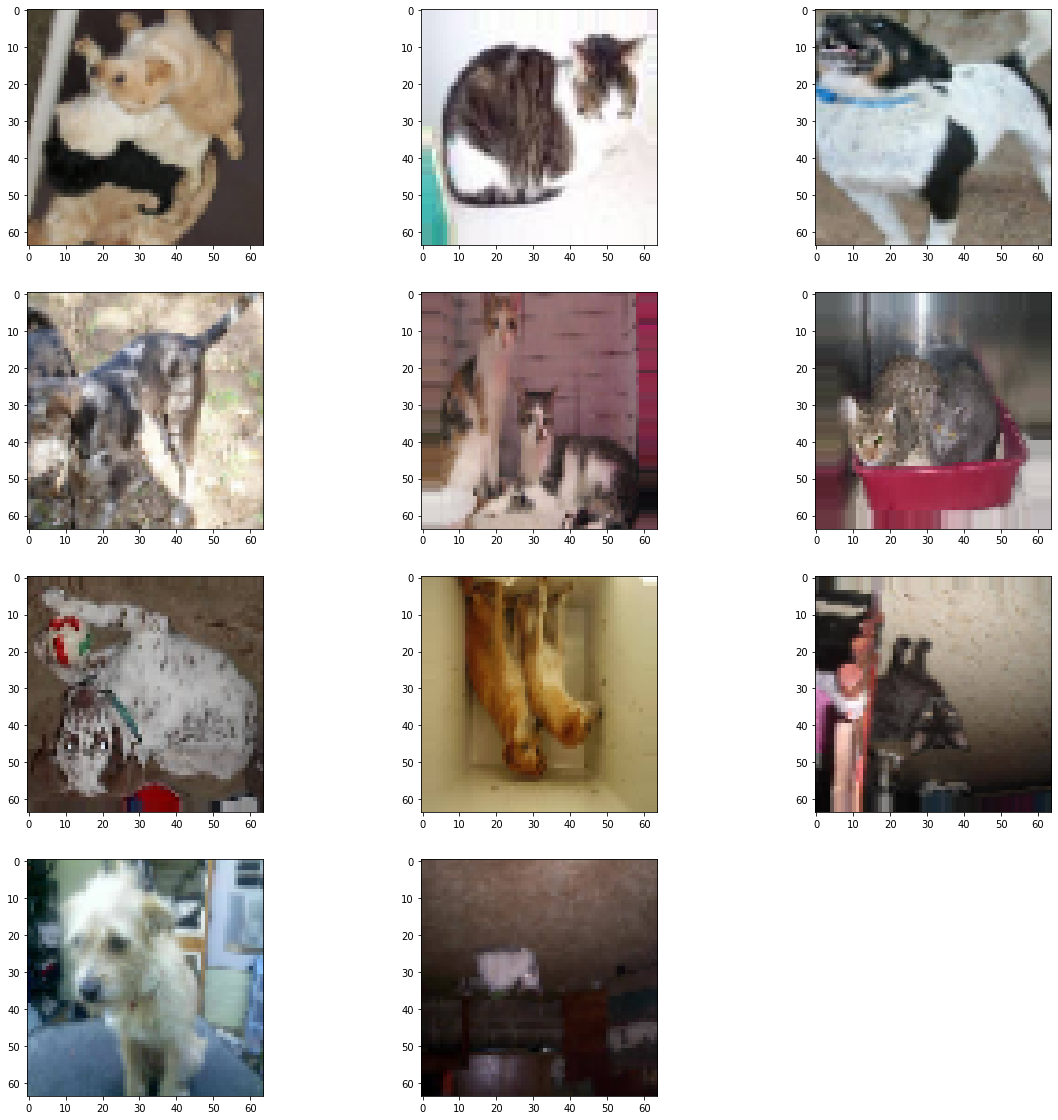

In [29]:
plt.figure(figsize=(20,20))
for i,image in enumerate(x_train,1):
    if(i==12):
        break
    plt.subplot(4,3,i)
    plt.imshow(image[0][i]) # 12 images in first batch 

In [27]:
x_test

In [28]:
# output indices in training data set 
x_train.class_indices

{'cats': 0, 'dogs': 1}

In [29]:
# Steps_per_epoch : Number of batches to consider out of 250 batches can give max of 250
#Epoch : number of iteration
# validation data : data set to validate the model xtext 
#Validation Steps : 2000/32 

In [ ]:
 model.fit_generator(x_train,steps_per_epoch=250,epochs=10,validation_data=x_test,validation_steps=63)

C:\Users\rgandyala\Anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
250/250 [==============================] - 352s 1s/step - loss: 1.0302 - accuracy: 0.5464 - val_loss: 0.6922 - val_accuracy: 0.5730
Epoch 2/10
250/250 [==============================] - 246s 984ms/step - loss: 0.6311 - accuracy: 0.6519 - val_loss: 0.6232 - val_accuracy: 0.6630
Epoch 3/10
 91/250 [=========>....................] - ETA: 1:40 - loss: 0.6385 - accuracy: 0.6433

In [35]:
model.save("cnn_cd.h5")